# **Milestone 1**

Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive/Datasets

final_masterdata.xlsx  ProductA.csv  ProductA_fb_impressions.csv  ProductA_google_clicks.csv


Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Uploading Dataset

In [4]:
# Load the datasets
df1 = pd.read_csv('/content/drive/MyDrive/Datasets/ProductA.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Datasets/ProductA_fb_impressions.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Datasets/ProductA_google_clicks.csv')


Printing Head for each dataset

In [5]:
# Display the first 5 rows of each dataset
print("Sales Data:")
print(df1.head())

print("\nFacebook Impressions Data:")
print(df2.head())

print("\nGoogle Clicks Data:")
print(df3.head())

# Display the number of rows and columns in each dataset
print(f"\nSales Data: {df1.shape[0]} rows and {df1.shape[1]} columns")
print(f"Facebook Impressions Data: {df2.shape[0]} rows and {df2.shape[1]} columns")
print(f"Google Clicks Data: {df3.shape[0]} rows and {df3.shape[1]} columns")

Sales Data:
   Day Index  Quantity
0  12/1/2021        14
1  12/2/2021        10
2  12/3/2021        13
3  12/4/2021        22
4  12/5/2021        33

Facebook Impressions Data:
   Day Index  Impressions
0  12/1/2021          620
1  12/2/2021          890
2  12/3/2021          851
3  12/4/2021          881
4  12/5/2021          678

Google Clicks Data:
   Day Index  Clicks
0  12/1/2021     445
1  12/2/2021     433
2  12/3/2021     424
3  12/4/2021     427
4  12/5/2021     451

Sales Data: 212 rows and 2 columns
Facebook Impressions Data: 212 rows and 2 columns
Google Clicks Data: 212 rows and 2 columns


Merging Datasets

In [6]:
# merging datasets
merged_df = df1.merge(df2,how="left", on='Day Index').merge(df3,how='left', on='Day Index')

cleaned_df = merged_df.dropna()

cleaned_df.to_csv('merged_file.csv', index=False)

print(cleaned_df)

     Day Index  Quantity  Impressions  Clicks
0    12/1/2021        14          620     445
1    12/2/2021        10          890     433
2    12/3/2021        13          851     424
3    12/4/2021        22          881     427
4    12/5/2021        33          678     451
..         ...       ...          ...     ...
207  6/26/2022        13         1218     114
208  6/27/2022        16         1311     106
209  6/28/2022        13          885     109
210  6/29/2022        16         1000      60
211  6/30/2022         8          875      65

[212 rows x 4 columns]


## **EDA**

Basic Visualization




*   Histogram plot



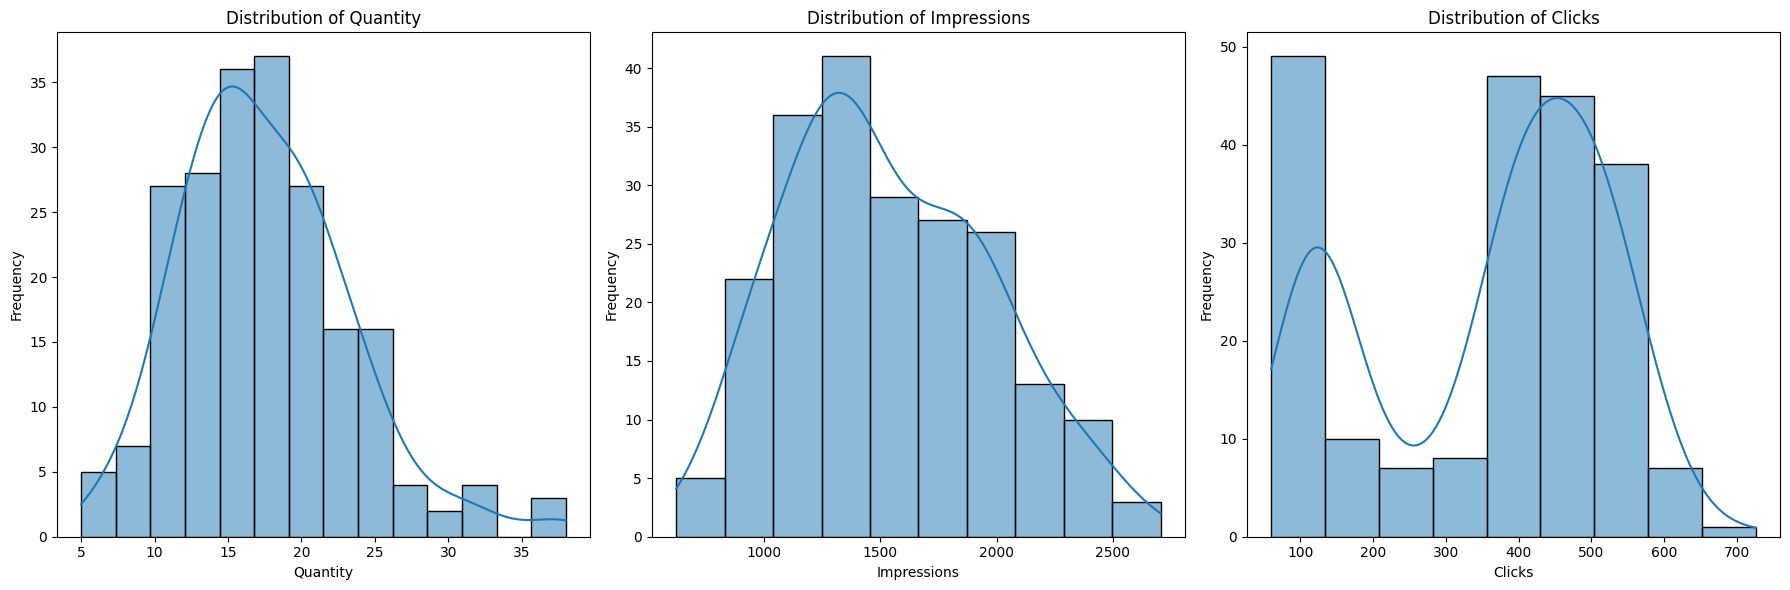

In [7]:
df = pd.read_csv('merged_file.csv')

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# List of columns to plot
columns = ['Quantity', 'Impressions', 'Clicks']

for i, col in enumerate(columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**Observations from the Distribution Plots**

I analyzed the distribution of Quantity, Impressions, and Clicks to understand the data spread and identify any skewness or outliers.


Here are my insights from each distribution plot:


*   Each plot clearly shows the overall data spread for the respective feature, helping me identify skewness or outliers in the data.
*   Peaks within these distributions indicate common value ranges, suggesting typical behavior or stable periods.

*   Higher peaks likely represent frequent events or periods with steady demand, providing insights into regular patterns.
* Valleys or dips in the distributions reveal less common occurrences, potentially pointing to gaps or infrequent demand.

These plots are essential for assessing the data distribution, identifying unusual data points, and informing any necessary data cleaning steps.


*   Quantity Through Times

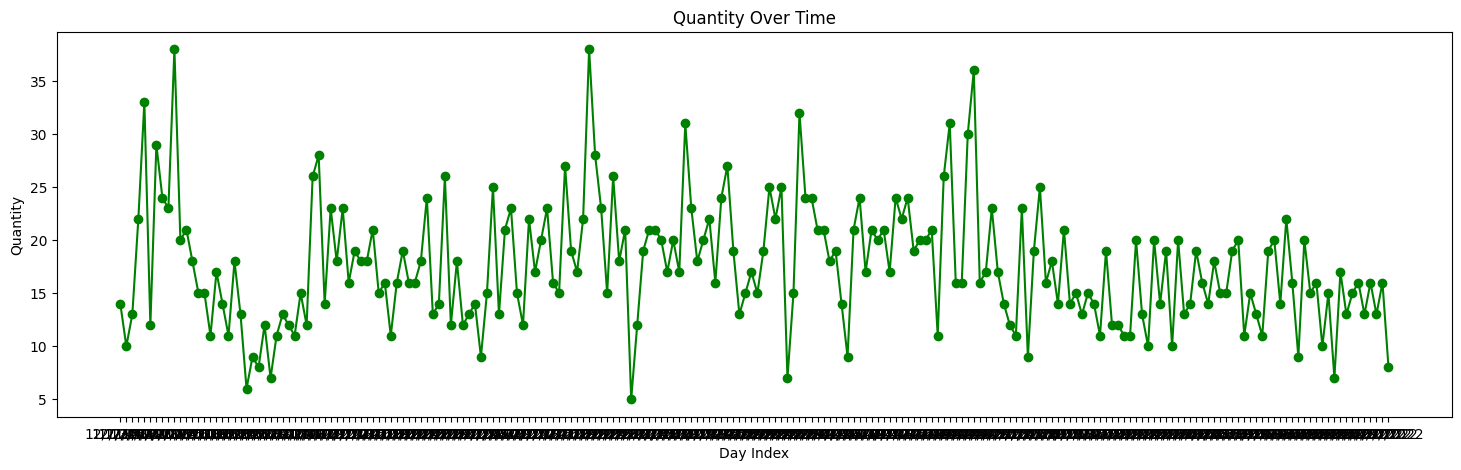

In [8]:
# Plot Quantity over time (Day Index)
plt.figure(figsize=(18, 5))
plt.plot(df['Day Index'], df['Quantity'], color='green', marker='o', linestyle='-')
plt.title('Quantity Over Time')
plt.xlabel('Day Index')
plt.ylabel('Quantity')
plt.grid(False)
plt.show()

**Quantity Over Time:**

*   I was noticing fluctuations in the quantity values across different days. Some days were showing spikes, which might have been indicating high-demand periods or special events.
*   I was observing consistent patterns on other days, suggesting regular activity.



 * *Impressions through time*



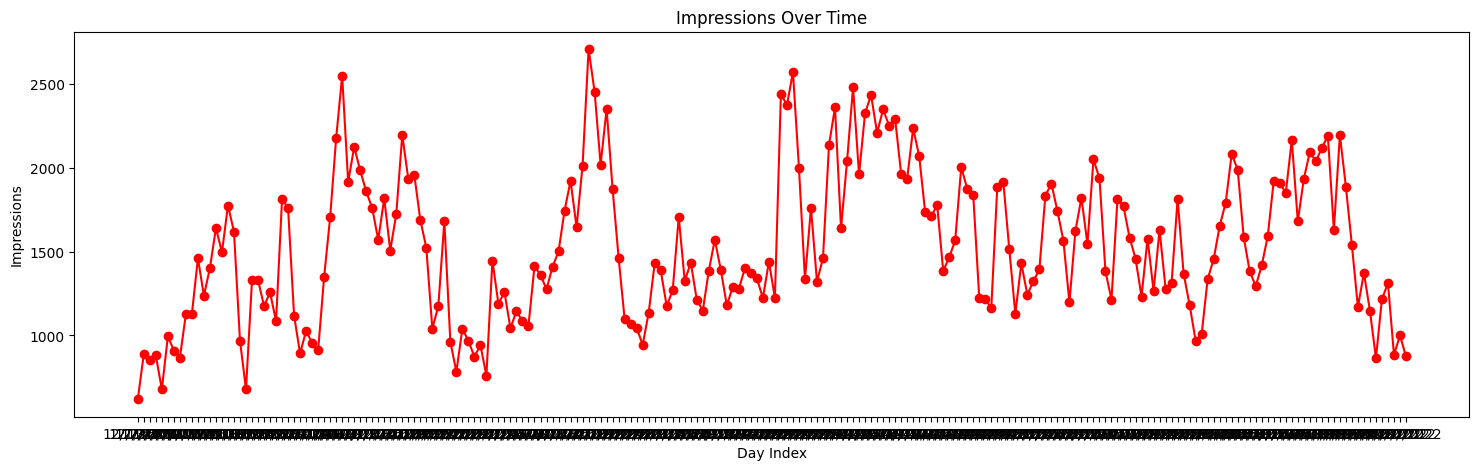

In [9]:
# Plot Impressions over time (Day Index)
plt.figure(figsize=(18, 5))
plt.plot(df['Day Index'], df['Impressions'], color='red', marker='o', linestyle='-')
plt.title('Impressions Over Time')
plt.xlabel('Day Index')
plt.ylabel('Impressions')
plt.grid(False)
plt.show()

Impressions Through Time:

*  When I was examining impressions, I was seeing trends where visibility was either increasing or remaining steady on certain days.

*   I was also identifying some dips in impressions, which could have been caused by external factors like reduced ad spend or visibility





*   Clicks Over time



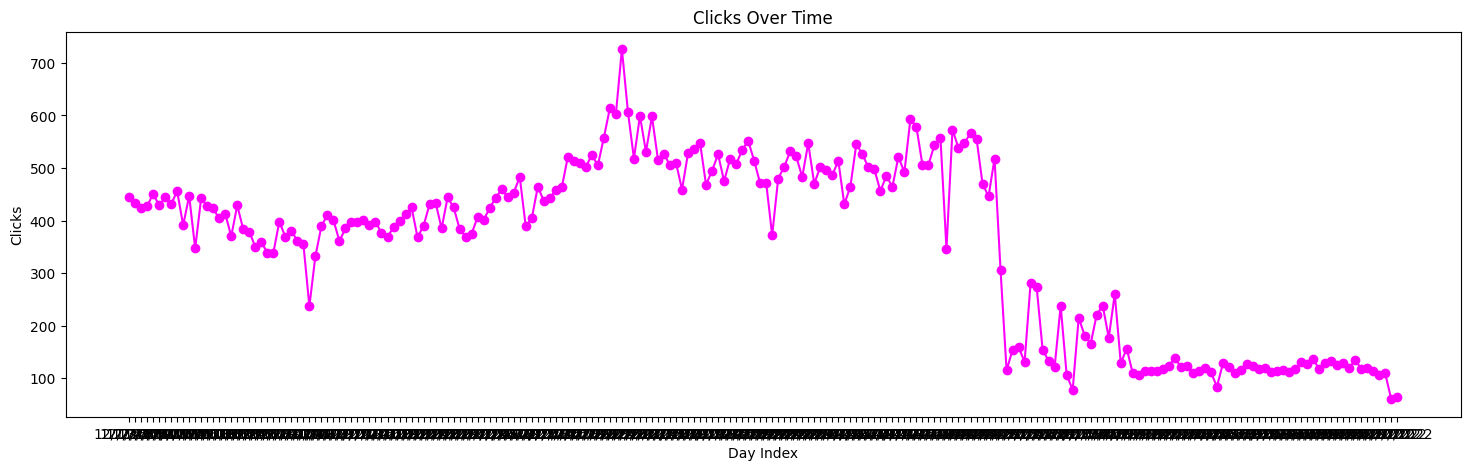

In [10]:
# Plot Clicks over time (Day Index)
plt.figure(figsize=(18, 5))
plt.plot(df['Day Index'], df['Clicks'], color='magenta', marker='o', linestyle='-')
plt.title('Clicks Over Time')
plt.xlabel('Day Index')
plt.ylabel('Clicks')
plt.grid(False)
plt.show()

Clicks Through Time:

*   As I was plotting clicks over time, I was identifying certain days where the clicks were peaking, possibly aligning with user engagement during specific campaigns or promotions.

*   I was noticing lower values on some days, which might have been reflecting reduced user activity or less effective marketing.




Display Missing Values

In [11]:
data = pd.read_csv('merged_file.csv')

missing_values = data.isnull().sum()

print(missing_values)

Day Index      0
Quantity       0
Impressions    0
Clicks         0
dtype: int64




*   No missing value present



Ploting outliers

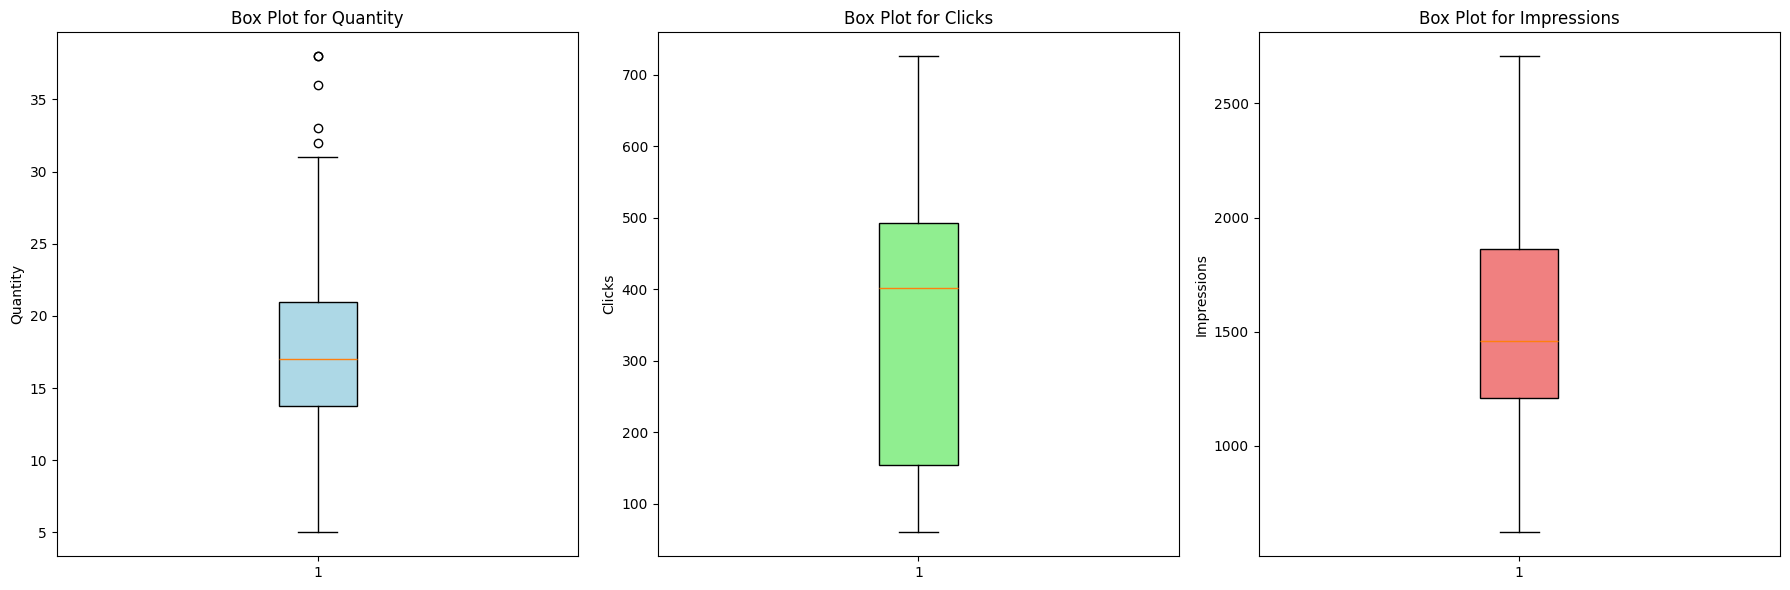

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

colors = ['lightblue', 'lightgreen', 'lightcoral']

# Box plot for Quantity
box1 = axes[0].boxplot(data['Quantity'], patch_artist=True)
axes[0].set_title('Box Plot for Quantity')
axes[0].set_ylabel('Quantity')
for patch in box1['boxes']:
    patch.set_facecolor(colors[0])

# Box plot for Clicks
box2 = axes[1].boxplot(data['Clicks'], patch_artist=True)
axes[1].set_title('Box Plot for Clicks')
axes[1].set_ylabel('Clicks')
for patch in box2['boxes']:
    patch.set_facecolor(colors[1])

# Box plot for Impressions
box3 = axes[2].boxplot(data['Impressions'], patch_artist=True)
axes[2].set_title('Box Plot for Impressions')
axes[2].set_ylabel('Impressions')
for patch in box3['boxes']:
    patch.set_facecolor(colors[2])

plt.tight_layout()
plt.show()




*   Clearly visible outlier present in Quantity



By the Interquartile Range (IQR) method, find outliers below the 25th percentile and above the 75th percentile.

In [13]:
import pandas as pd

def find_outliers_IQR(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    IQR = q3 - q1
    outliers = column[(column < (q1 - 1.5 * IQR)) | (column > (q3 + 1.5 * IQR))]
    return outliers

# Print the number of outliers for each column
print(f"Quantity:\t {len(find_outliers_IQR(data['Quantity']))}")
print(f"Clicks:\t\t {len(find_outliers_IQR(data['Clicks']))}")
print(f"Impressions:\t {len(find_outliers_IQR(data['Impressions']))}")


Quantity:	 5
Clicks:		 0
Impressions:	 0


There are 5 outlier in Quantity



*   Quantity outliers are printing



In [14]:
print(f"Quantity:\n{find_outliers_IQR(data['Quantity'])}")

Quantity:
4      33
9      38
78     38
113    32
142    36
Name: Quantity, dtype: int64


**Replacing Outliers with 98th percentile**

print the 98 percentile value

In [15]:
percentile_98_value = data["Quantity"].quantile(0.98)
print(percentile_98_value)

31.78


In [16]:
def calculate_outliers_98th_percentile(series):
    q1, q3 = series.quantile([0.25, 0.75])
    IQR = q3 - q1
    lower_bound, upper_bound = q1 - 1.5 * IQR, q3 + 1.5 * IQR
    percentile_95_value = series.quantile(0.98)
    return series.apply(lambda x: percentile_98_value if x < lower_bound or x > upper_bound else x)

In [17]:
data['updated_Quantity'] = calculate_outliers_98th_percentile(data['Quantity'])
data['updated_Quantity'] = data['updated_Quantity'].astype(int)

Printing the merge data set after updated outliers

In [18]:
data.head()

,Day Index,Quantity,Impressions,Clicks,updated_Quantity
0,12/1/2021,14,620,445,14
1,12/2/2021,10,890,433,10
2,12/3/2021,13,851,424,13
3,12/4/2021,22,881,427,22
4,12/5/2021,33,678,451,31


Ploting again after updated outlier

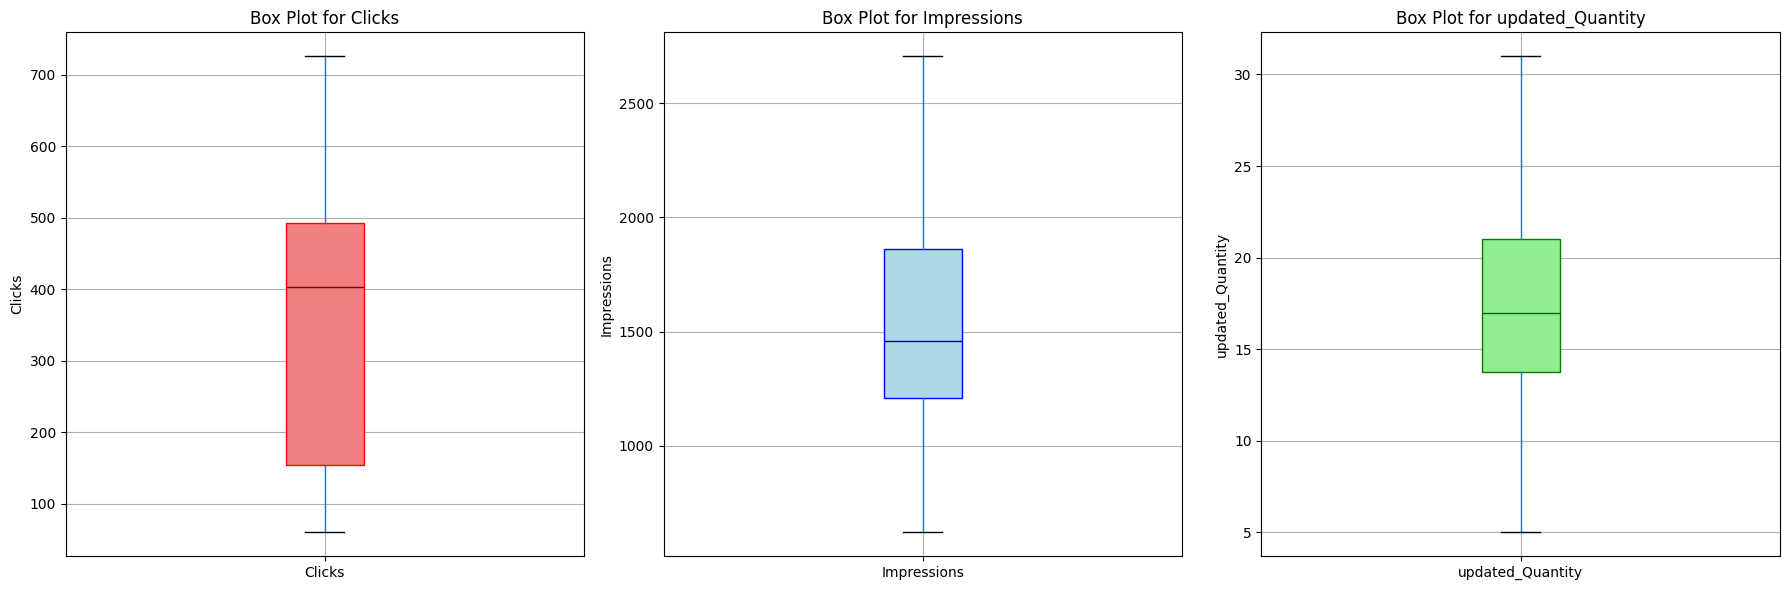

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

data.boxplot(column='Clicks', ax=axes[0],
             flierprops=dict(markerfacecolor='orange', marker='o'),
             medianprops=dict(color='darkred'),
             patch_artist=True,
             boxprops=dict(facecolor='lightcoral', color='red'))
axes[0].set_title('Box Plot for Clicks')
axes[0].set_ylabel('Clicks')

data.boxplot(column='Impressions', ax=axes[1],
             flierprops=dict(markerfacecolor='green', marker='o'),
             medianprops=dict(color='darkblue'),
             patch_artist=True,
             boxprops=dict(facecolor='lightblue', color='blue'))
axes[1].set_title('Box Plot for Impressions')
axes[1].set_ylabel('Impressions')

data.boxplot(column='updated_Quantity', ax=axes[2],
             flierprops=dict(markerfacecolor='yellow', marker='o'),
             medianprops=dict(color='darkgreen'),
             patch_artist=True,
             boxprops=dict(facecolor='lightgreen', color='green'))
axes[2].set_title('Box Plot for updated_Quantity')
axes[2].set_ylabel('updated_Quantity')

plt.tight_layout()
plt.show()




*   The above boxplot shows that updated_quantity doesn't contain any values with outliers.



## **Feature Engineering**

In [20]:
import holidays

# Ensure 'Day Index' is in datetime format
data['Day Index'] = pd.to_datetime(data['Day Index'], errors='coerce')

# Day of the month
data['Day of the Month'] = data['Day Index'].dt.day

# Extracting month and day of the week
data['month'] = data['Day Index'].dt.month_name()
data['day_of_week'] = data['Day Index'].dt.day_name()

data['YearMonth'] = data['Day Index'].dt.to_period('M')

# Creating binary columns for months
months = data['month'].unique()
for month in months:
    data[month] = (data['month'] == month).astype(int)

# Creating binary columns for days of the week
days_of_week = data['day_of_week'].unique()
for day in days_of_week:
    data[day] = (data['day_of_week'] == day).astype(int)

# Weekend feature
data['Is_Weekend'] = data['Day Index'].dt.dayofweek.isin([5, 6]).astype(int)

# Weekdays
data['Is_Weekday'] = 1 - data['Is_Weekend']

# Holiday feature
us_holidays = holidays.US()
data['Is_Holiday'] = data['Day Index'].apply(lambda x: 1 if x in us_holidays else 0)

print(data.head())


   Day Index  Quantity  Impressions  Clicks  updated_Quantity  \
0 2021-12-01        14          620     445                14   
1 2021-12-02        10          890     433                10   
2 2021-12-03        13          851     424                13   
3 2021-12-04        22          881     427                22   
4 2021-12-05        33          678     451                31   

   Day of the Month     month day_of_week YearMonth  December  ...  Wednesday  \
0                 1  December   Wednesday   2021-12         1  ...          1   
1                 2  December    Thursday   2021-12         1  ...          0   
2                 3  December      Friday   2021-12         1  ...          0   
3                 4  December    Saturday   2021-12         1  ...          0   
4                 5  December      Sunday   2021-12         1  ...          0   

   Thursday  Friday  Saturday  Sunday  Monday  Tuesday  Is_Weekend  \
0         0       0         0       0       0       

In [21]:
data.dtypes

,0
Day Index,datetime64[ns]
Quantity,int64
Impressions,int64
Clicks,int64
updated_Quantity,int64
Day of the Month,int32
month,object
day_of_week,object
YearMonth,period[M]
December,int64


In [22]:
data.to_excel('final_masterdata.xlsx', index=False)

In [23]:
df=pd.read_excel('final_masterdata.xlsx')

### **Visualization**

Ploting Corelation matrix

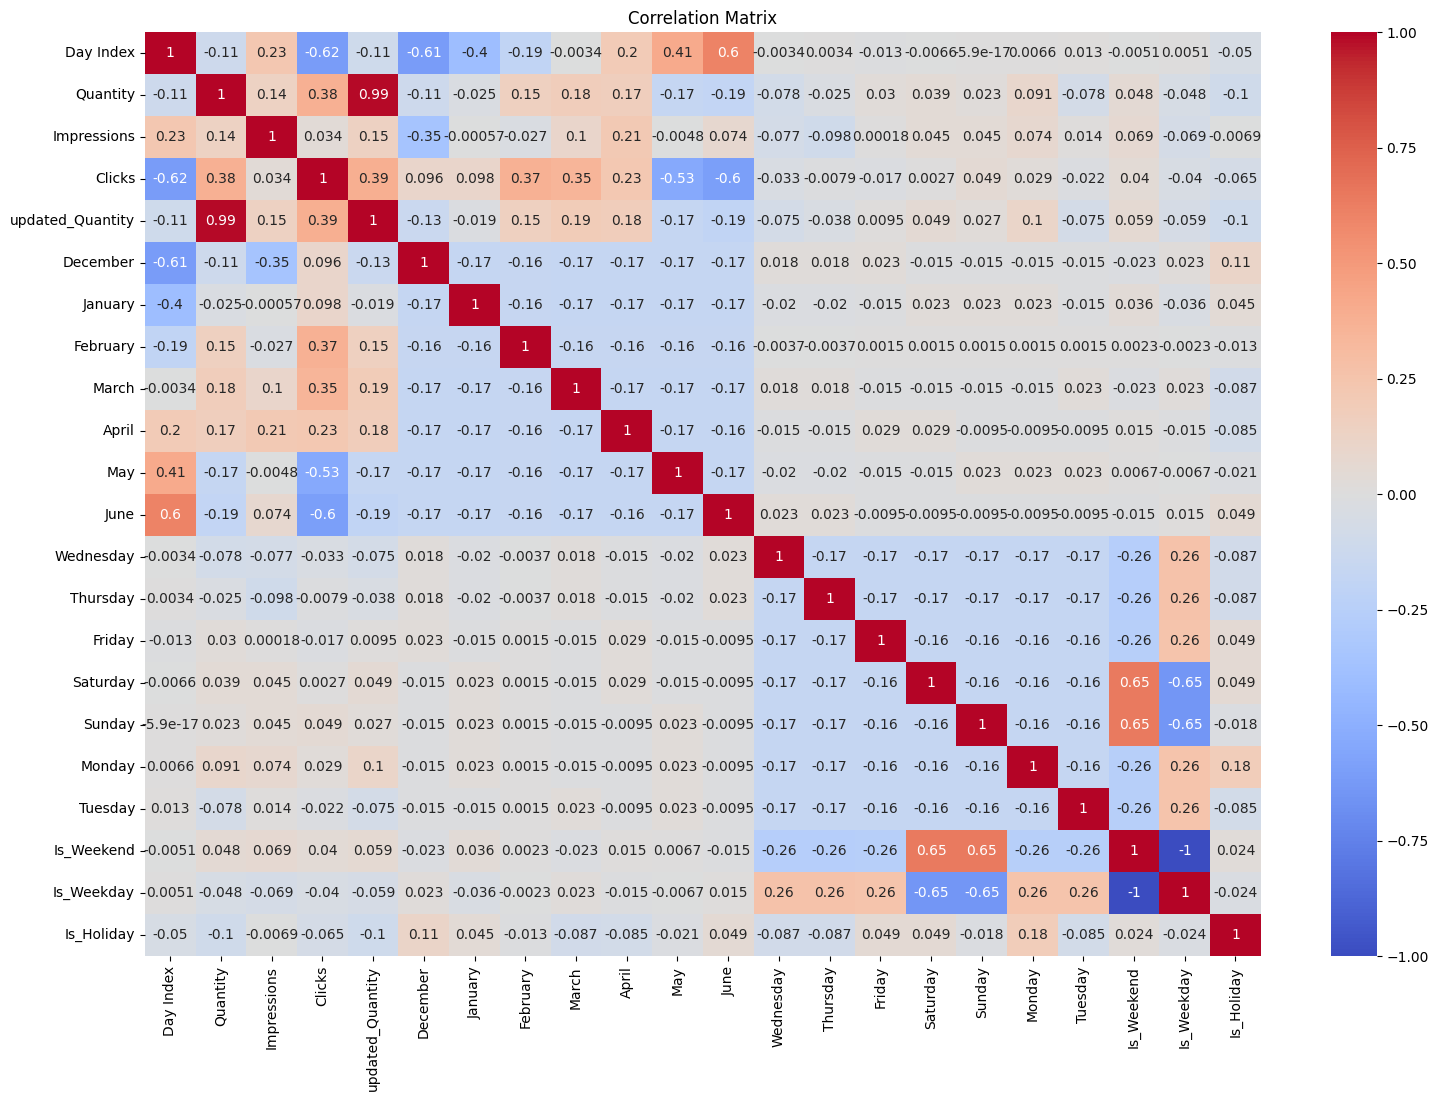

In [24]:
#import seaborn as sns
df_filtered = df.drop(columns=['YearMonth', 'Day of the Month', 'day_of_week','month'])

df_encoded = pd.get_dummies(df_filtered, drop_first=True)

plt.figure(figsize=(18,12))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**Through the above correlation heatmap we can say that:**


*   Clicks have good correlation with Quantity

*   Impressions also have slight relation with Quantity

*   Impressions have tiny relation with Clicks

I was using a correlation heatmap to understand relationships between variables in my dataset. It provided a visual summary of how each pair of variables correlated. Here's what I gained:

**Final Master Data Plot**

Day wise plot

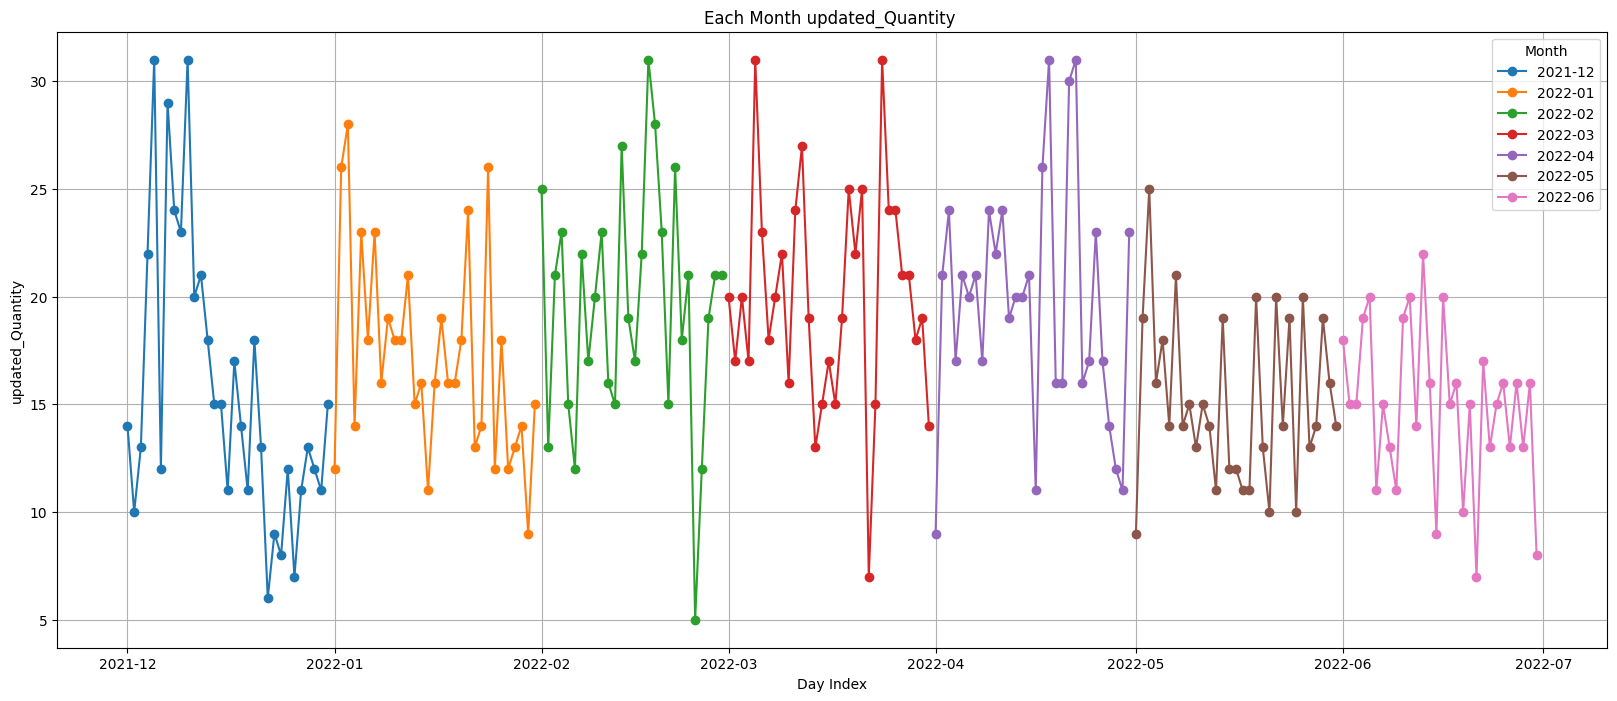

In [25]:
plt.figure(figsize=(20, 8))

for month in df['YearMonth'].unique():
    monthly_data = df[df['YearMonth'] == month]
    plt.plot(monthly_data['Day Index'], monthly_data['updated_Quantity'], marker='o', linestyle='-', label=str(month))

plt.title('Each Month updated_Quantity ')
plt.xlabel('Day Index')
plt.ylabel('updated_Quantity')
plt.legend(title='Month', loc='best')
plt.grid(True)

plt.show()

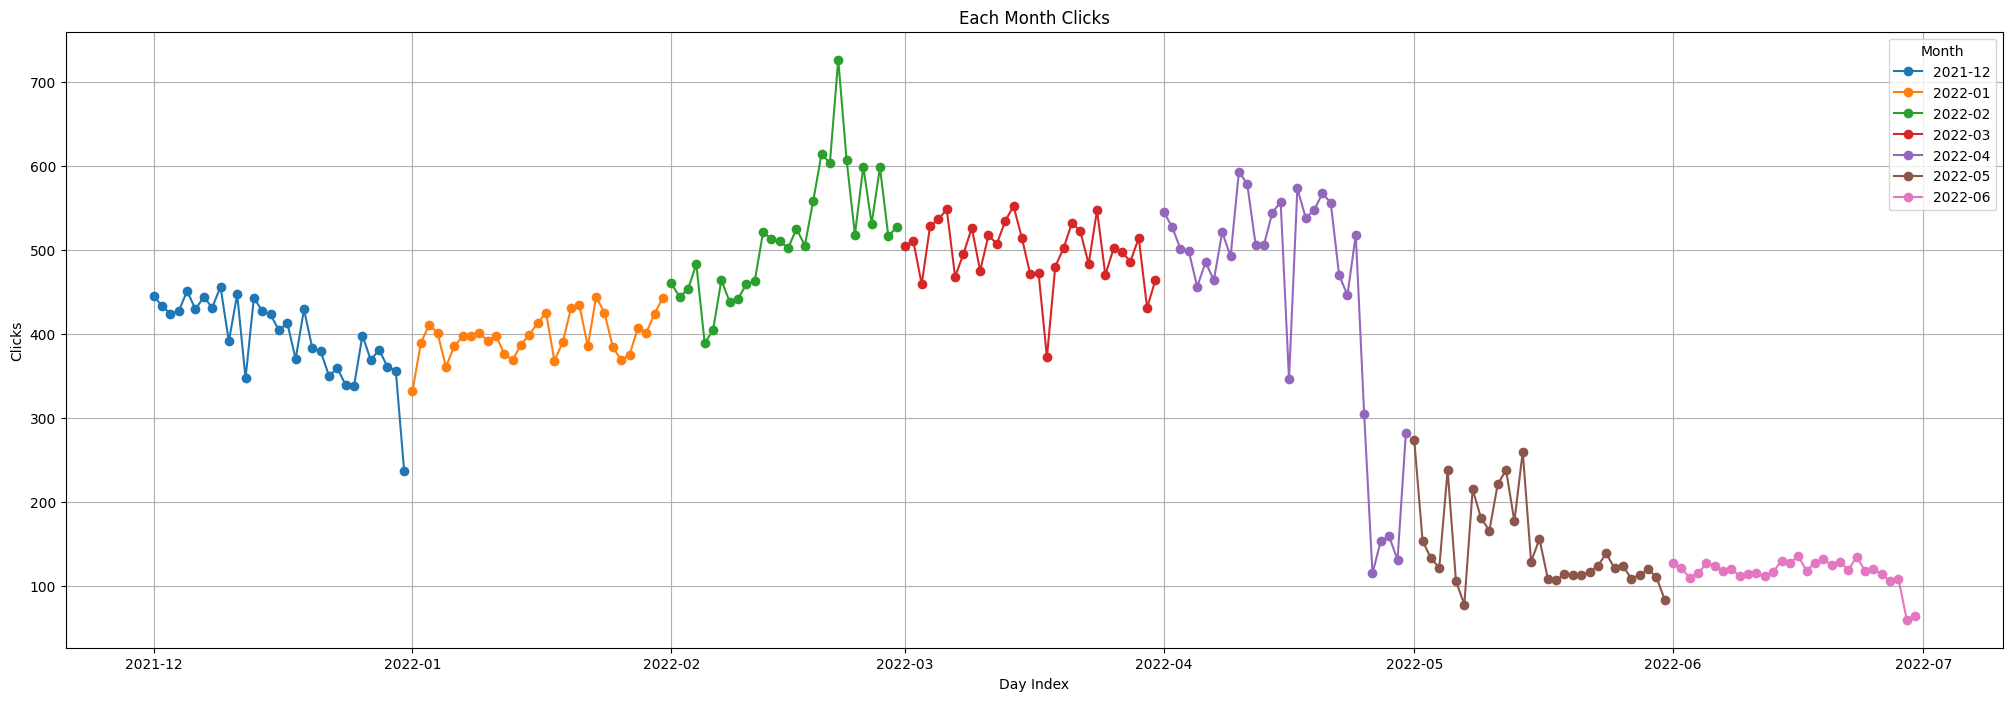

In [26]:
plt.figure(figsize=(25, 8))

for month in df['YearMonth'].unique():
    monthly_data = df[df['YearMonth'] == month]
    plt.plot(monthly_data['Day Index'], monthly_data['Clicks'], marker='o', linestyle='-', label=str(month))

plt.title('Each Month Clicks')
plt.xlabel('Day Index')
plt.ylabel('Clicks')
plt.legend(title='Month', loc='best')
plt.grid(True)

plt.show()

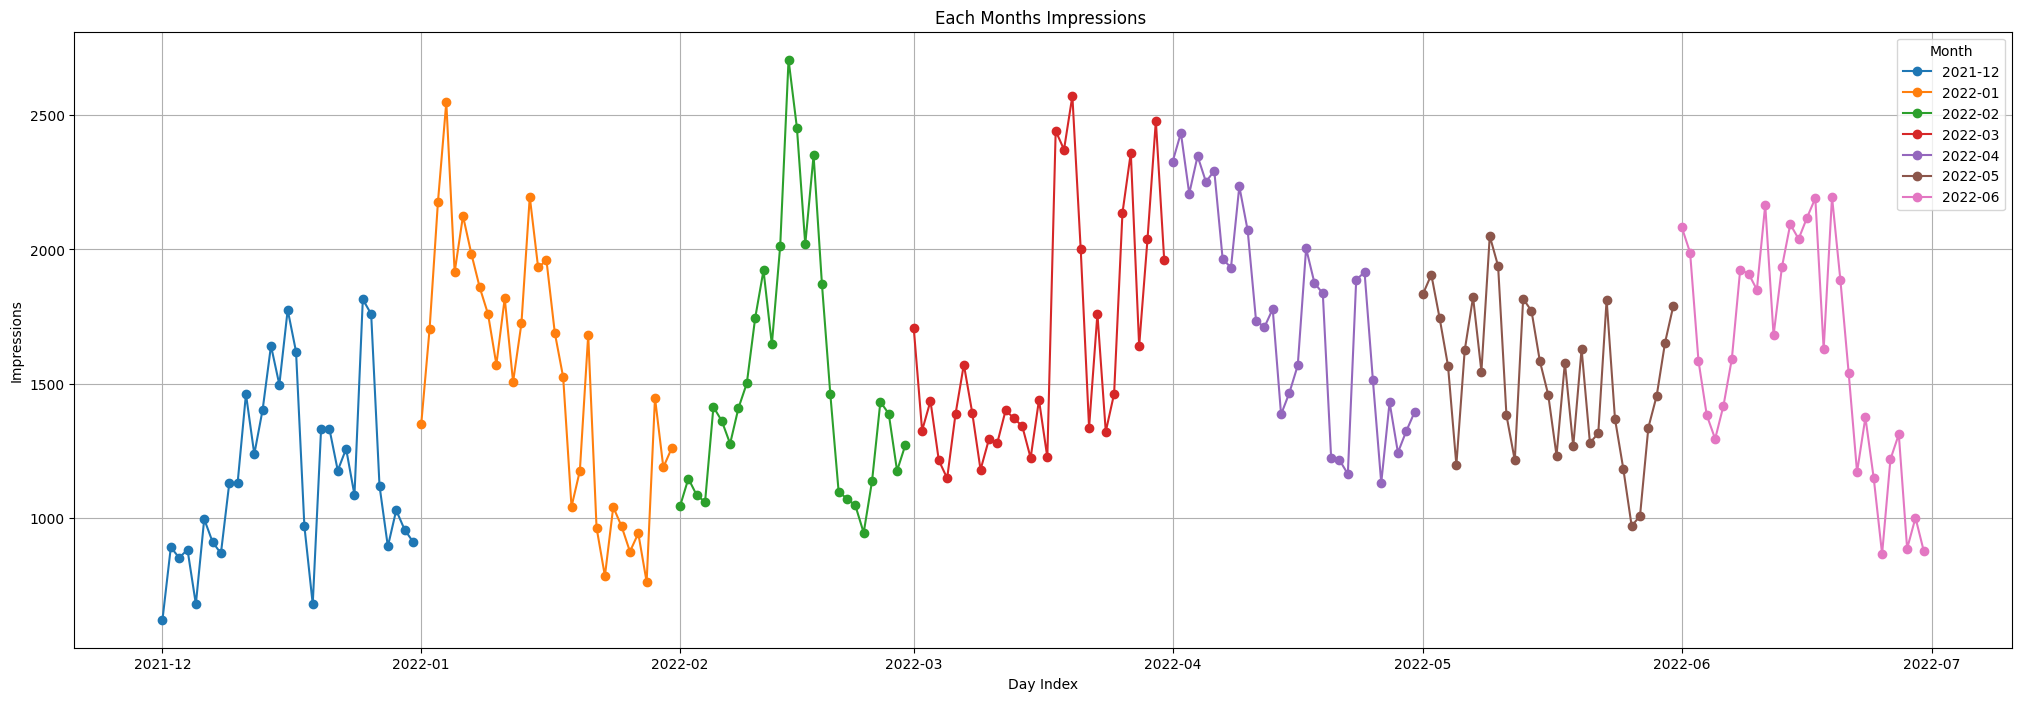

In [27]:
plt.figure(figsize=(25, 8))

for month in df['YearMonth'].unique():
    monthly_data = df[df['YearMonth'] == month]
    plt.plot(monthly_data['Day Index'], monthly_data['Impressions'], marker='o', linestyle='-', label=str(month))

plt.title('Each Months Impressions ')
plt.xlabel('Day Index')
plt.ylabel('Impressions')
plt.legend(title='Month', loc='best')
plt.grid(True)

plt.show()

**Monthly** **plots**

<ipython-input-28-c7741c216f92>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(monthly_quantity))


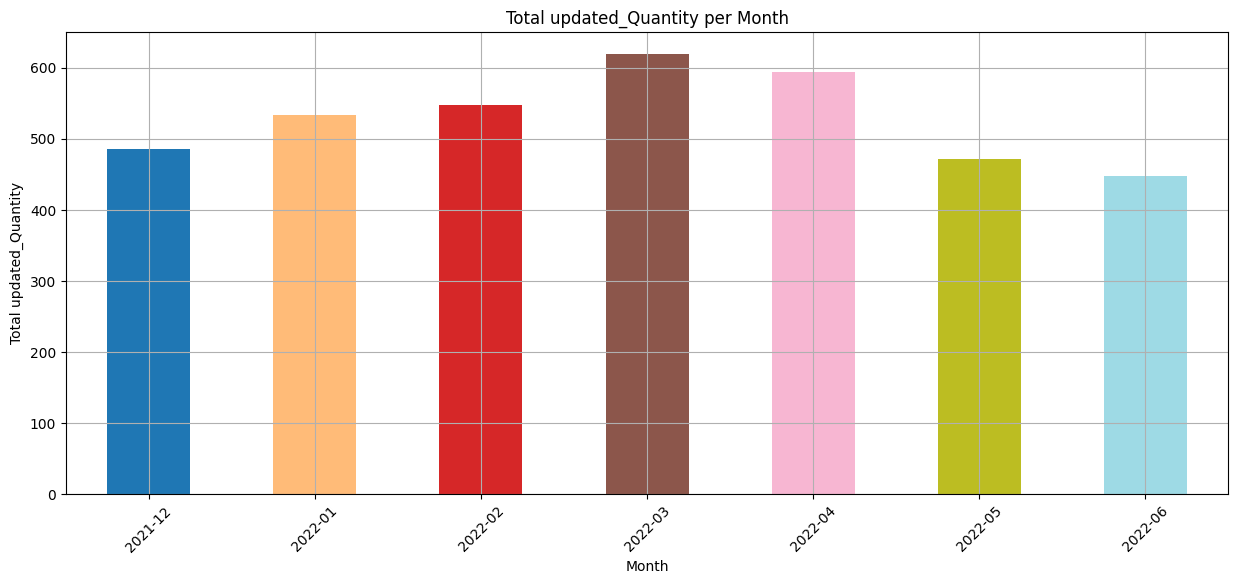

In [28]:
monthly_quantity = df.groupby('YearMonth')['updated_Quantity'].sum()

colors = plt.cm.get_cmap('tab20', len(monthly_quantity))

plt.figure(figsize=(15, 6))
monthly_quantity.plot(kind='bar', color=colors(range(len(monthly_quantity))))

plt.title('Total updated_Quantity per Month')
plt.xlabel('Month')
plt.ylabel('Total updated_Quantity')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


Month wise plot

<ipython-input-29-91424e0dd622>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(monthly_clicks))


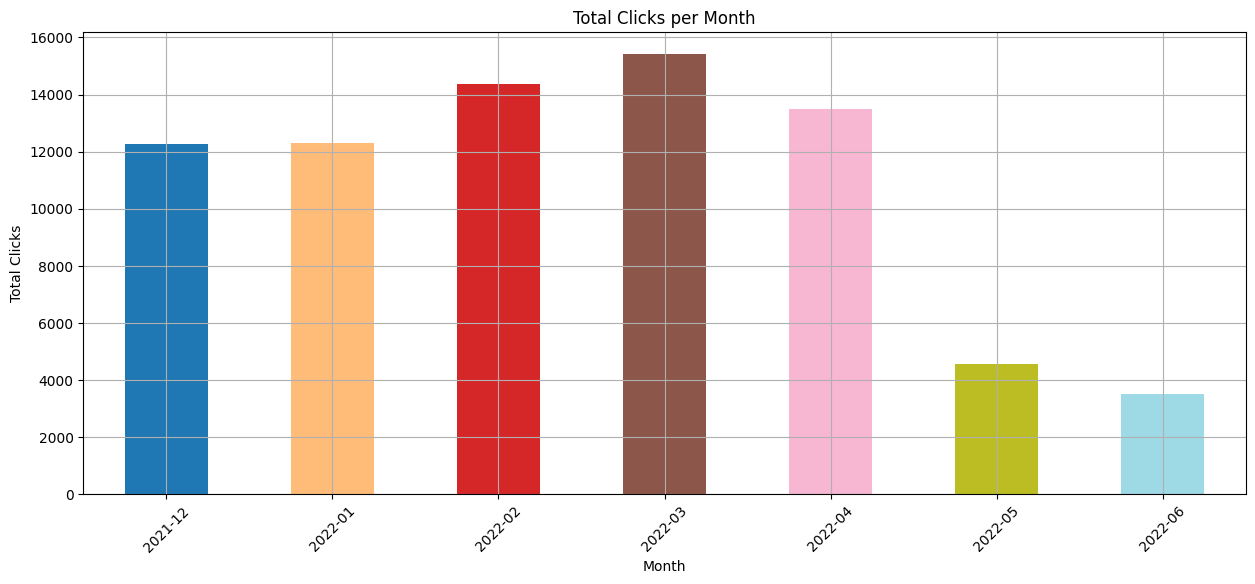

In [29]:
monthly_clicks = df.groupby('YearMonth')['Clicks'].sum()

colors = plt.cm.get_cmap('tab20', len(monthly_clicks))

plt.figure(figsize=(15, 6))
monthly_clicks.plot(kind='bar', color=colors(range(len(monthly_clicks))))

plt.title('Total Clicks per Month')
plt.xlabel('Month')
plt.ylabel('Total Clicks')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


<ipython-input-30-3efb249794c0>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(monthly_impressions))


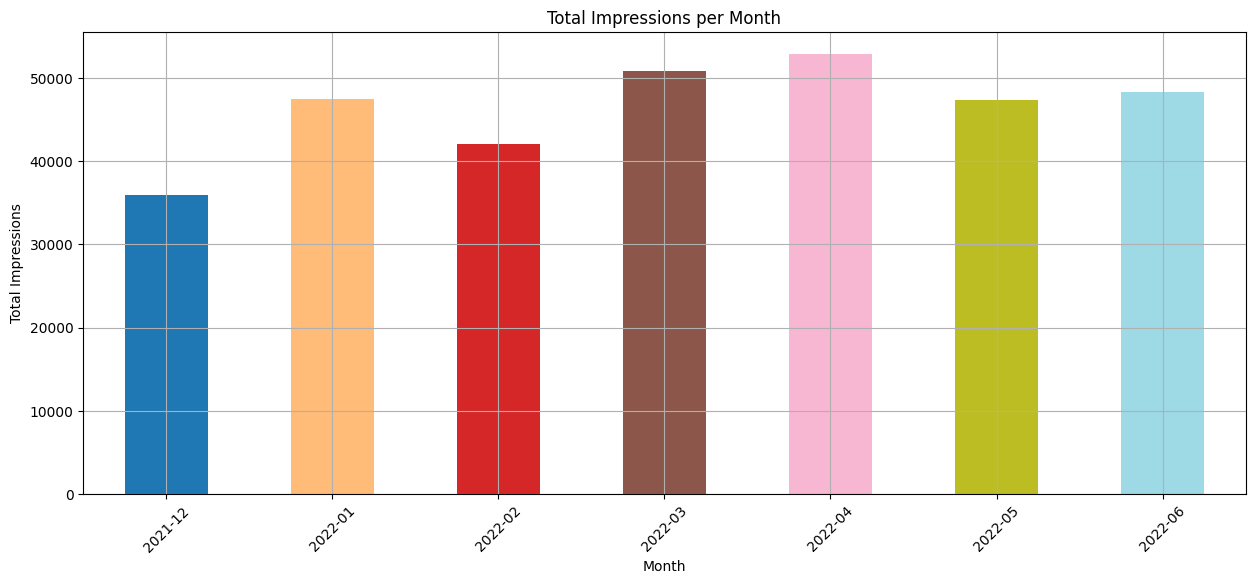

In [30]:
monthly_impressions = df.groupby('YearMonth')['Impressions'].sum()

colors = plt.cm.get_cmap('tab20', len(monthly_impressions))

plt.figure(figsize=(15, 6))
monthly_impressions.plot(kind='bar', color=colors(range(len(monthly_impressions))))

plt.title('Total Impressions per Month')
plt.xlabel('Month')
plt.ylabel('Total Impressions')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


Day of the Week Distribution Ploting

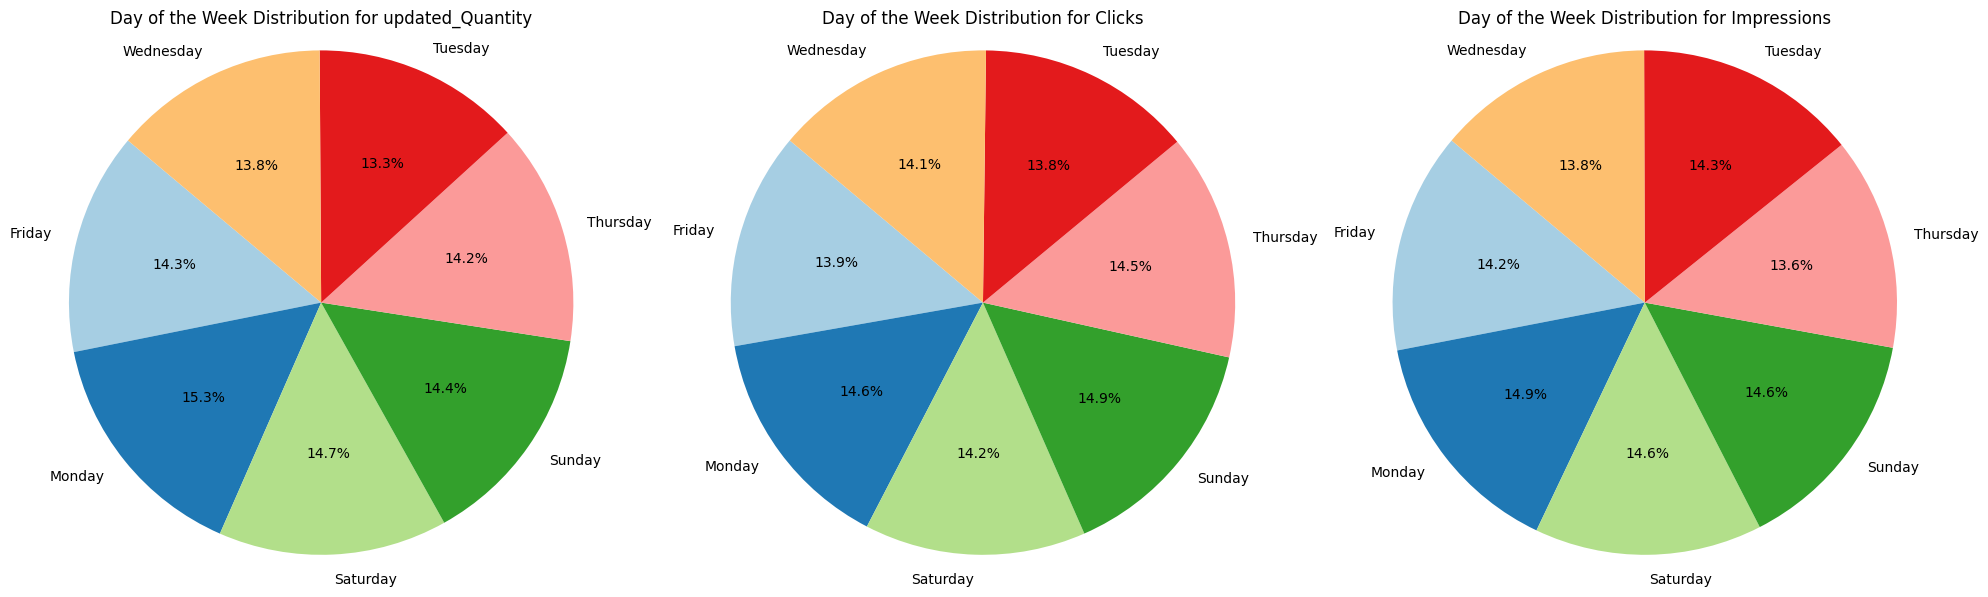

In [31]:
df['DayOfWeek'] = df['Day Index'].apply(lambda x: pd.to_datetime(x).strftime('%A'))

# Function to plot pie chart for Day of the Week distribution
def plot_daywise_pie(df, x_col, y_col, title, ax):
    df1 = df.groupby(x_col)[y_col].sum().reset_index()

    sizes = df1[y_col]
    labels = df1[x_col]

    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    ax.set_title(title)
    ax.axis('equal')

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Pie chart for updated_Quantity
plot_daywise_pie(df, 'DayOfWeek', 'updated_Quantity', 'Day of the Week Distribution for updated_Quantity', axes[0])

# Pie chart for Clicks
plot_daywise_pie(df, 'DayOfWeek', 'Clicks', 'Day of the Week Distribution for Clicks', axes[1])

# Pie chart for Impressions
plot_daywise_pie(df, 'DayOfWeek', 'Impressions', 'Day of the Week Distribution for Impressions', axes[2])

plt.tight_layout()
plt.show()


Average Quantity ploting Weekdays vs. Weekends

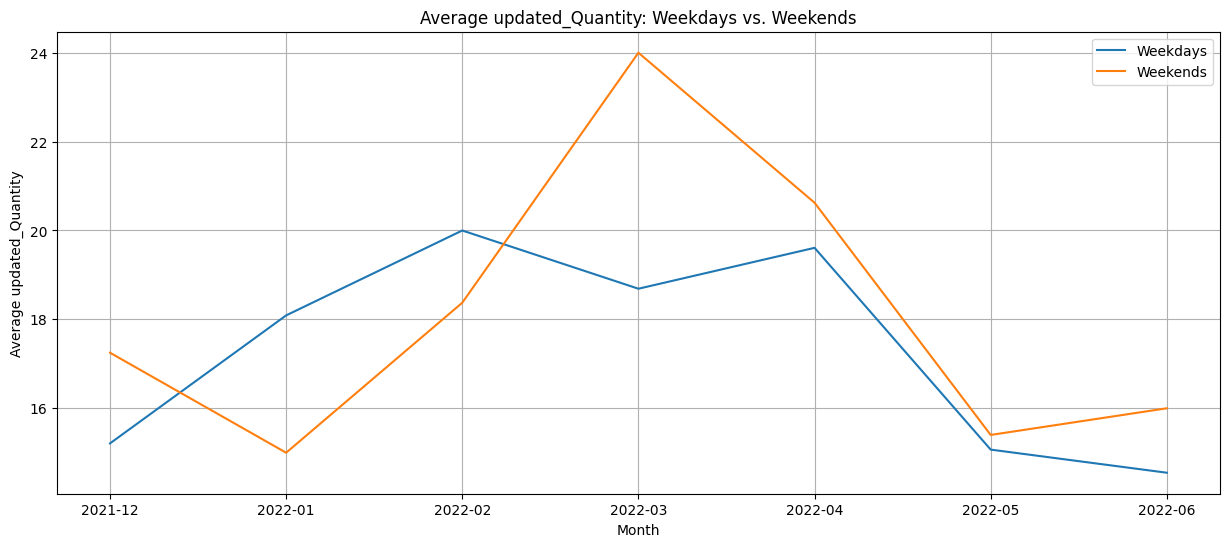

In [32]:
weekday_avg = df[df['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])].groupby(['YearMonth', 'day_of_week'])['updated_Quantity'].mean().unstack()
weekend_avg = df[df['day_of_week'].isin(['Saturday', 'Sunday'])].groupby(['YearMonth', 'day_of_week'])['updated_Quantity'].mean().unstack()

# Calculate the average updated_Quantity for weekdays and weekends across all months
weekday_avg_overall = weekday_avg.mean(axis=1)
weekend_avg_overall = weekend_avg.mean(axis=1)

plt.figure(figsize=(15, 6))
plt.plot(weekday_avg_overall.index, weekday_avg_overall.values, label='Weekdays')
plt.plot(weekend_avg_overall.index, weekend_avg_overall.values, label='Weekends')

plt.title('Average updated_Quantity: Weekdays vs. Weekends')
plt.xlabel('Month')
plt.ylabel('Average updated_Quantity')
plt.legend()
plt.grid(True)
plt.show()

**Strength and Direction of Relationships:**

I examined correlations between variables, with values close to 1 indicating strong positive relationships, -1 showing negative relationships, and 0 indicating weak or no correlation. For example, higher "updated quantity" correlated with more "impressions."

**Key Influencers:**
I identified closely related variables, such as "impressions" and "clicks," suggesting that increasing impressions could boost clicks.

**Redundancies:**

I noticed redundant variables like "updated quantity" and "quantity" with high correlation, which allowed me to simplify the dataset by focusing on one.

**Outliers and Patterns:**

I observed weak correlations between "clicks" and "impressions," prompting further investigation into potential outliers or missing data.

**Heatmap Visualization:**

The heatmap helped visualize these insights, guiding further analysis and decision-making.

**Statistical Summary:**

**Quantity**:
Daily sales trends showed higher values during specific periods, potentially linked to seasonal factors, promotions, or weekends.
Impressions and Clicks: These indicated online engagement, with impressions showing visibility and clicks showing user interaction.
Updated Quantity: I compared this with actual "Quantity" to assess the accuracy of updated data.
**Temporal Variables**:
 "Day of Week" and "Weekend" revealed patterns in sales, with weekends showing potential demand shifts. The "Month Name" and one-hot encoded variables highlighted seasonal trends, like higher sales in December.
Seasonal and Day-Based Patterns: One-hot encoded month columns revealed strong seasonal trends, especially around holidays. Day-specific patterns, like on "Monday" or "Friday," also indicated potential demand spikes

#**Milestone 2**

Updated_Quantity analysis

<ipython-input-33-6a3fd2cb9c46>:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').sum()[['updated_Quantity', 'Clicks', 'Impressions']]


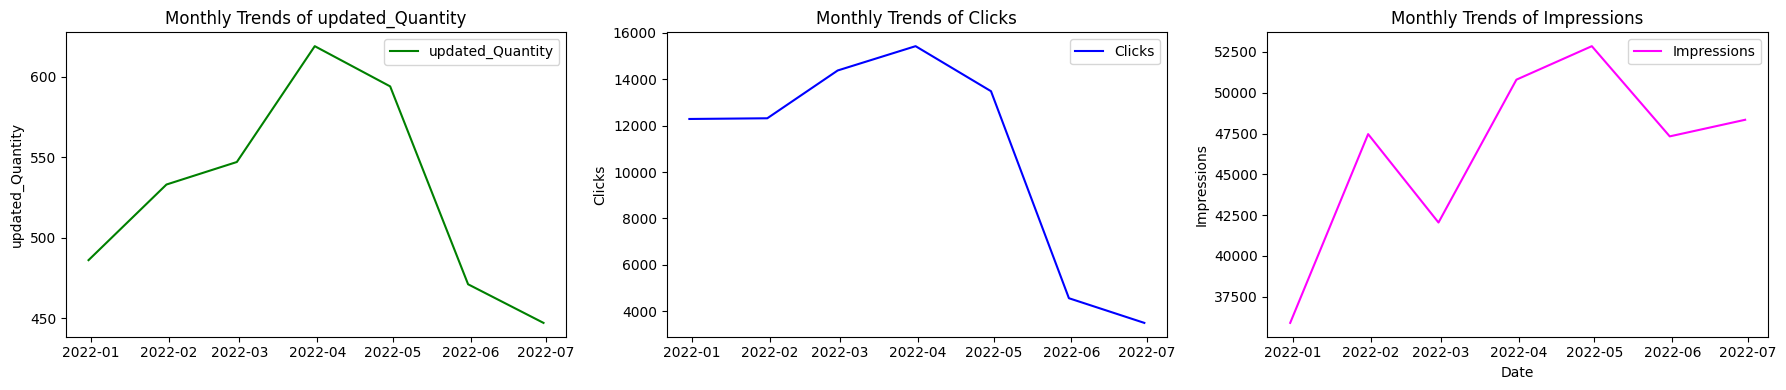

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load the data
file_path = '/content/drive/MyDrive/Datasets/final_masterdata.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Convert 'Day Index' to datetime format
data['Day Index'] = pd.to_datetime(data['Day Index'])

# Set 'Day Index' as the index for easier resampling by month
data.set_index('Day Index', inplace=True)

# Resample to monthly data, summing up the values for the relevant columns
monthly_data = data.resample('M').sum()[['updated_Quantity', 'Clicks', 'Impressions']]

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18,4), sharex=True)

# Set y-axis tick intervals to 50 for the specified axis
axs[0].yaxis.set_major_locator(ticker.MultipleLocator(50))

axs[0].plot(monthly_data.index, monthly_data['updated_Quantity'], label='updated_Quantity', color='green')
axs[0].set_ylabel('updated_Quantity')
axs[0].set_title('Monthly Trends of updated_Quantity')
axs[0].legend(loc='best')

# Plot Clicks
axs[1].plot(monthly_data.index, monthly_data['Clicks'], label='Clicks', color='blue')
axs[1].set_ylabel('Clicks')
axs[1].set_title('Monthly Trends of Clicks')
axs[1].legend(loc='best')

# Plot Impressions
axs[2].plot(monthly_data.index, monthly_data['Impressions'], label='Impressions', color='magenta')
axs[2].set_ylabel('Impressions')
axs[2].set_xlabel('Date')
axs[2].set_title('Monthly Trends of Impressions')
axs[2].legend(loc='best')

# Improve layout and show plot
plt.tight_layout()
plt.show()


### Modeling on Time Series Analysis

**Data Scaling**

In [34]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

file_path = '/content/drive/MyDrive/Datasets/final_masterdata.xlsx'
df = pd.read_excel(file_path)

# Select numeric columns for scaling
columns_to_scale = ['updated_Quantity', 'Clicks', 'Impressions']
scaler = MinMaxScaler()

# Apply MinMaxScaler
scaled_data = df.copy()
scaled_data[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the scaled data for verification
print(scaled_data[columns_to_scale].head())

   updated_Quantity    Clicks  Impressions
0          0.346154  0.578078     0.000000
1          0.192308  0.560060     0.129372
2          0.307692  0.546547     0.110685
3          0.653846  0.551051     0.125060
4          1.000000  0.587087     0.027791


Stationarity checking for updated_quantity

In [35]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

file_path = '/content/drive/MyDrive/Datasets/final_masterdata.xlsx'
df = pd.read_excel(file_path)

if 'Day Index' in df.columns:
    df.set_index('Day Index', inplace=True)

df = df.drop('2021-12-01', errors='ignore')

# Define the ADF test function
def adfuller_test(series, series_name, signif=0.05):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic for {series_name}:', result[0])
    print(f'p-value for {series_name}:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    if result[1] <= signif:
        print(f" => {series_name} is Stationary. (Reject the null hypothesis)")
    else:
        print(f" => {series_name} is Non-Stationary. (Fail to reject the null hypothesis)")
    print("_" * 70)

# Perform the ADF test on the specified columns
columns_to_test = ["updated_Quantity"]
for column in columns_to_test:
    if column in df.columns:
        print(f"ADF Test for {column}:")
        adfuller_test(df[column], column)
    else:
        print(f"Column '{column}' not found in the dataset. Skipping.")


ADF Test for updated_Quantity:
ADF Statistic for updated_Quantity: -4.288097150756537
p-value for updated_Quantity: 0.0004657741111497586
Critical Values:
	1%: -3.4623415245233145
	5%: -2.875606128263243
	10%: -2.574267439846904
 => updated_Quantity is Stationary. (Reject the null hypothesis)
______________________________________________________________________


***updated_Quantity is Stationary***

**Split, Train & Test**

Splitting data set into 75:25 part

In [36]:
data.index = pd.to_datetime(data.index)  # Convert index to datetime if not already
data = data.asfreq('D')  # Set frequency to daily (adjust as needed)

# Split the data into train and test sets
train_size = int(len(data) * 0.75)  # Calculate 75% of the data as training size
train = data.iloc[:train_size]  # First 75% for training
test = data.iloc[train_size:]   # Remaining 25% for testing

# Extract the "updated_Quantity" column specifically
train_updated_quantity = train['updated_Quantity']
test_updated_quantity = test['updated_Quantity']

# Display the sizes of the splits
print(f"Total data size: {len(data)}")
print(f"Training data size: {len(train_updated_quantity)}")
print(f"Testing data size: {len(test_updated_quantity)}")


Total data size: 212
Training data size: 159
Testing data size: 53


Train-Test Split for Updated Quantity

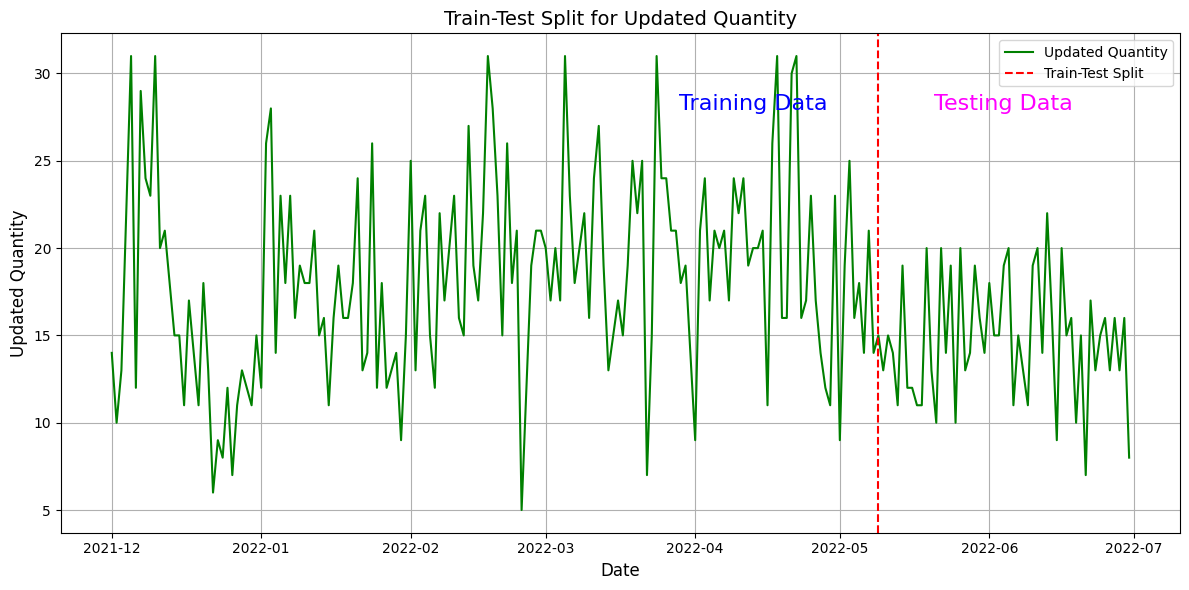

In [37]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

file_path = '/content/drive/MyDrive/Datasets/final_masterdata.xlsx'
data = pd.read_excel(file_path)

data['Day Index'] = pd.to_datetime(data['Day Index'])
data.set_index('Day Index', inplace=True)

# Split the data into training (75%) and testing (25%)
train_size = int(len(data) * 0.75)
train = data.iloc[:train_size]
test = data.iloc[train_size:]

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data['updated_Quantity'], label='Updated Quantity', color='green')

# Highlight the train-test split
plt.axvline(data.index[train_size], color='red', linestyle='--', label='Train-Test Split')

# Annotate the split with labels for training and testing
plt.text(data.index[train_size - len(test)//2], max(data['updated_Quantity']) * 0.9,
         'Training Data', color='blue', fontsize=16, horizontalalignment='center')
plt.text(data.index[train_size + len(test)//2], max(data['updated_Quantity']) * 0.9,
         'Testing Data', color='magenta', fontsize=16, horizontalalignment='center')

# Add title, legend, and labels
plt.title('Train-Test Split for Updated Quantity', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Updated Quantity', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### Implementation of AR Model

AR Model Metrics(Before Hyper Tuning):
MAE: 3.9590924927959743
RMSE: 4.743013014627009
MAPE: 33.40%
R^2: -0.8348359010305346
Differencing Mean: 0.0


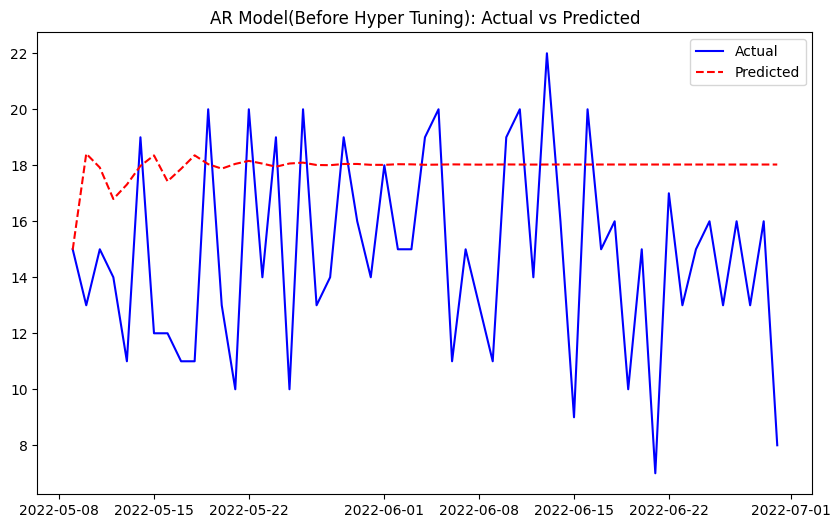

In [38]:
# Import the AR model
from statsmodels.tsa.ar_model import AutoReg
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Fit the AR model
ar_model = AutoReg(train['updated_Quantity'], lags=10).fit()

# Make predictions
predictions = ar_model.predict(start=len(train), end=len(train)+len(test)-1)

# Differencing (manual differencing to stabilize data)
train_diff = train['updated_Quantity'].diff().dropna()
adf_stat_diff = train_diff.mean()  # Metric on differencing (mean of differenced series)

# Calculate metrics
mae = mean_absolute_error(test['updated_Quantity'], predictions)
rmse = np.sqrt(mean_squared_error(test['updated_Quantity'], predictions))
mape = np.mean(np.abs((test['updated_Quantity'] - predictions) / test['updated_Quantity'])) * 100
r2 = r2_score(test['updated_Quantity'], predictions)

# Display metrics
print(f"AR Model Metrics(Before Hyper Tuning):\nMAE: {mae}\nRMSE: {rmse}\nMAPE: {mape:.2f}%\nR^2: {r2}\nDifferencing Mean: {adf_stat_diff}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(test['updated_Quantity'], label='Actual', color='blue')
plt.plot(predictions, label='Predicted', color='red',linestyle='--')
plt.title('AR Model(Before Hyper Tuning): Actual vs Predicted')
plt.legend()
plt.show()


Hyper Tuning for AR Model

Best Lag: 10 with RMSE: 4.7430
Best AR Model Metrics(After Hyper Tuning):
MAE: 3.9590924927959743
RMSE: 4.743013014627009
MAPE: 33.40%
R^2: -0.8348359010305346


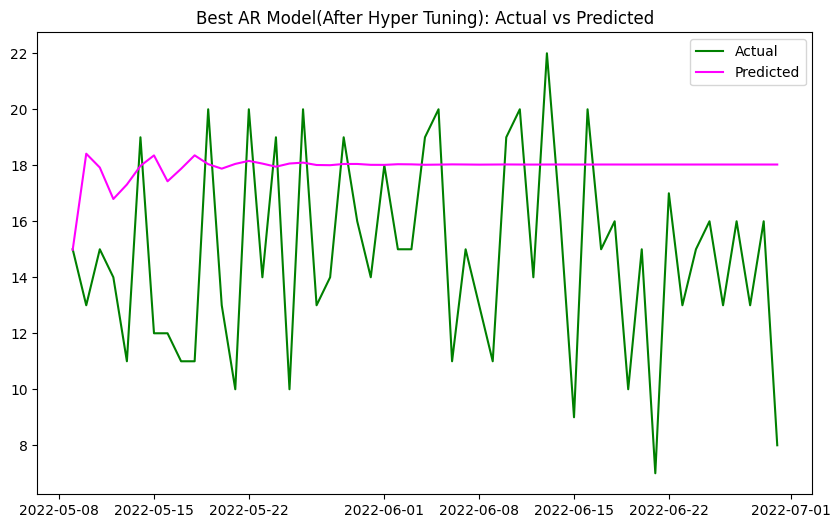

In [40]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Define a function to tune the AR model for different lag values
def tune_ar_model(train, test, max_lag):
    best_lag = None
    best_rmse = float("inf")
    results = []

    for lag in range(1, max_lag + 1):
        try:
            # Fit AR model with the current lag
            ar_model = AutoReg(train['updated_Quantity'], lags=lag).fit()
            predictions = ar_model.predict(start=len(train), end=len(train) + len(test) - 1)

            # Calculate metrics
            mae = mean_absolute_error(test['updated_Quantity'], predictions)
            rmse = np.sqrt(mean_squared_error(test['updated_Quantity'], predictions))
            mape = np.mean(np.abs((test['updated_Quantity'] - predictions) / test['updated_Quantity'])) * 100
            r2 = r2_score(test['updated_Quantity'], predictions)

            # Save results
            results.append({'Lag': lag, 'MAE': mae, 'RMSE': rmse, 'MAPE': mape, 'R2': r2})

            # Update best lag if RMSE is improved
            if rmse < best_rmse:
                best_rmse = rmse
                best_lag = lag

        except Exception as e:
            print(f"Error with lag {lag}: {e}")
            continue

    return results, best_lag, best_rmse

# Perform hyperparameter tuning (set max_lag as desired, e.g., 20)
max_lag = 20
ar_results, best_lag, best_rmse = tune_ar_model(train, test, max_lag)

# Display the best lag and corresponding RMSE
print(f"Best Lag: {best_lag} with RMSE: {best_rmse:.4f}")

# Convert results to a DataFrame for easier visualization
ar_results_df = pd.DataFrame(ar_results)


print(f"Best AR Model Metrics(After Hyper Tuning):\nMAE: {mae}\nRMSE: {rmse}\nMAPE: {mape:.2f}%\nR^2: {r2}")
plt.figure(figsize=(10, 6))
plt.plot(test['updated_Quantity'], label='Actual', color='green')
plt.plot(predictions, label='Predicted', color='magenta')
plt.title('Best AR Model(After Hyper Tuning): Actual vs Predicted')
plt.legend()
plt.show()

AR Model hyperparameter tuning results saved to 'armodel_result.xlsx'.


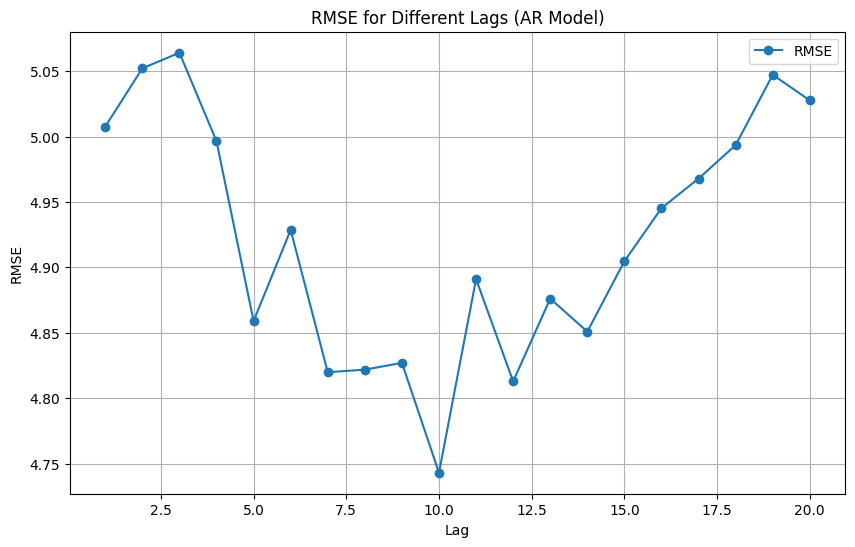

In [41]:
# Save results to an Excel file
ar_results_df.to_excel("armodel_result.xlsx", index=False)
print("AR Model hyperparameter tuning results saved to 'armodel_result.xlsx'.")

# Plot the RMSE for different lags
plt.figure(figsize=(10, 6))
plt.plot(ar_results_df['Lag'], ar_results_df['RMSE'], marker='o', label='RMSE')
plt.title("RMSE for Different Lags (AR Model)")
plt.xlabel("Lag")
plt.ylabel("RMSE")
plt.legend()
plt.grid()
plt.show()


**Implementation of MA Model**

MA Model Metrics(Before Hyper Tuning):
MAE: 4.071225093420155
RMSE: 4.881079364654831
MAPE: 34.37%
R^2: -0.9432126759942605
Differencing Mean: 0.0


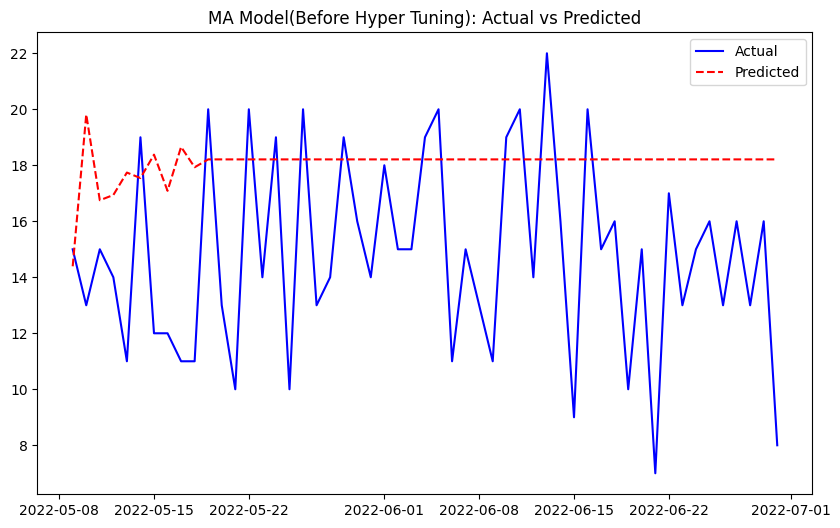

In [47]:
# Import the MA model
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ignore all warnings
warnings.filterwarnings('ignore')

# Fit the MA model (order=(0, 0, q))
ma_model = ARIMA(train['updated_Quantity'], order=(0, 0, 10)).fit()

# Make predictions
predictions = ma_model.forecast(steps=len(test))

# Differencing metrics
adf_stat_diff = train['updated_Quantity'].diff().mean()

# Calculate metrics
mae = mean_absolute_error(test['updated_Quantity'], predictions)
rmse = np.sqrt(mean_squared_error(test['updated_Quantity'], predictions))
mape = np.mean(np.abs((test['updated_Quantity'] - predictions) / test['updated_Quantity'])) * 100
r2 = r2_score(test['updated_Quantity'], predictions)

# Display metrics
print(f"MA Model Metrics(Before Hyper Tuning):\nMAE: {mae}\nRMSE: {rmse}\nMAPE: {mape:.2f}%\nR^2: {r2}\nDifferencing Mean: {adf_stat_diff}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(test['updated_Quantity'], label='Actual', color='blue')
plt.plot(predictions, label='Predicted', color='red', linestyle='--')
plt.title('MA Model(Before Hyper Tuning): Actual vs Predicted')
plt.legend()
plt.show()


Hyperparameter Tuning for MA Model

Best q: 8 with RMSE: 4.8437
MA Model hyperparameter tuning results saved to 'mamodel_result.xlsx'.


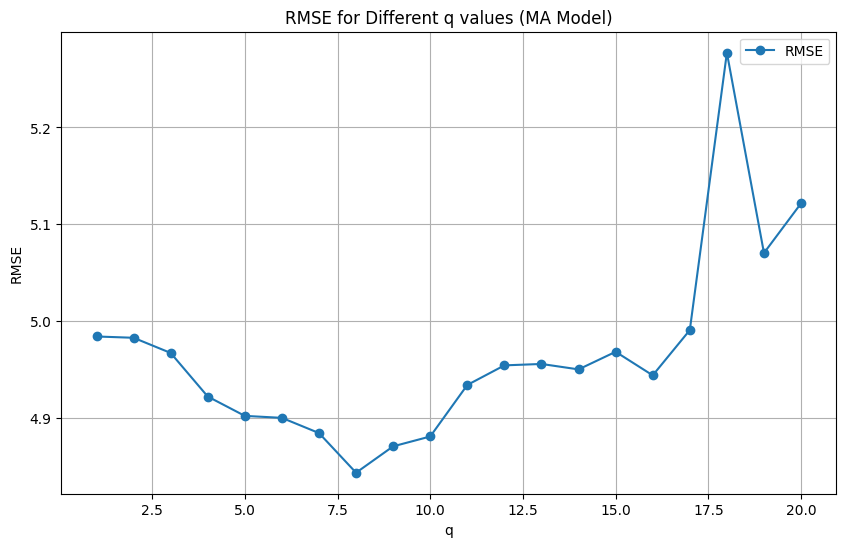

In [46]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Define a function to tune the MA model for different 'q' values
def tune_ma_model(train, test, max_q):
    best_q = None
    best_rmse = float("inf")
    results = []

    for q in range(1, max_q + 1):
        try:
            # Fit the MA model with the current 'q'
            ma_model = ARIMA(train['updated_Quantity'], order=(0, 0, q)).fit()
            predictions = ma_model.forecast(steps=len(test))

            # Calculate metrics
            mae = mean_absolute_error(test['updated_Quantity'], predictions)
            rmse = np.sqrt(mean_squared_error(test['updated_Quantity'], predictions))
            mape = np.mean(np.abs((test['updated_Quantity'] - predictions) / test['updated_Quantity'])) * 100
            r2 = r2_score(test['updated_Quantity'], predictions)

            # Save results
            results.append({'q': q, 'MAE': mae, 'RMSE': rmse, 'MAPE': mape, 'R2': r2})

            # Update best 'q' if RMSE is improved
            if rmse < best_rmse:
                best_rmse = rmse
                best_q = q

        except Exception as e:
            print(f"Error with q={q}: {e}")
            continue

    return results, best_q, best_rmse

# Perform hyperparameter tuning (set max_q as desired, e.g., 20)
max_q = 20
ma_results, best_q, best_rmse = tune_ma_model(train, test, max_q)

# Display the best 'q' and corresponding RMSE
print(f"Best q: {best_q} with RMSE: {best_rmse:.4f}")

# Convert results to a DataFrame for easier visualization
ma_results_df = pd.DataFrame(ma_results)


# Save results to an Excel file
ma_results_df.to_excel("mamodel_result.xlsx", index=False)
print("MA Model hyperparameter tuning results saved to 'mamodel_result.xlsx'.")

# Plot the RMSE for different q values
plt.figure(figsize=(10, 6))
plt.plot(ma_results_df['q'], ma_results_df['RMSE'], marker='o', label='RMSE')
plt.title("RMSE for Different q values (MA Model)")
plt.xlabel("q")
plt.ylabel("RMSE")
plt.legend()
plt.grid()
plt.show()

Best MA Model Metrics(After Hyper Tuning):
q: 8
MAE: 4.0480
RMSE: 4.8437
MAPE: 34.15%
R^2: -0.9135


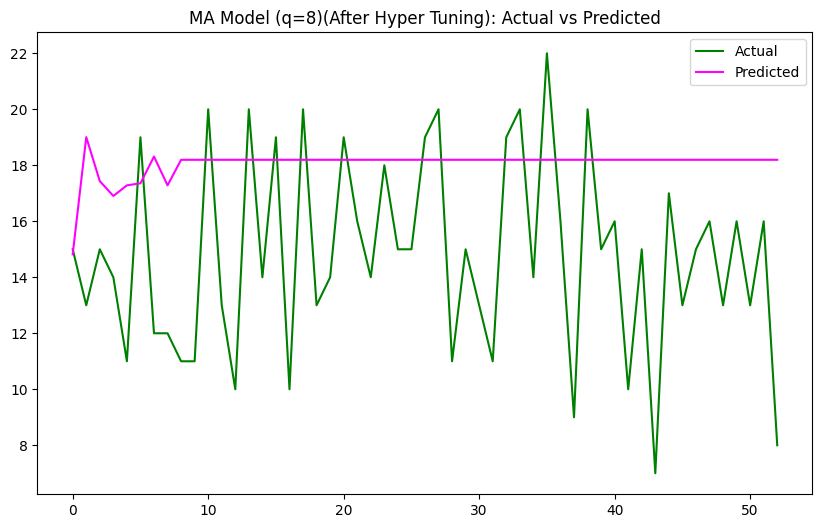

In [48]:
# Fit the MA model with the best 'q'
final_ma_model = ARIMA(train['updated_Quantity'], order=(0, 0, best_q)).fit()
final_predictions = final_ma_model.forecast(steps=len(test))

# Calculate final metrics
final_mae = mean_absolute_error(test['updated_Quantity'], final_predictions)
final_rmse = np.sqrt(mean_squared_error(test['updated_Quantity'], final_predictions))
final_mape = np.mean(np.abs((test['updated_Quantity'] - final_predictions) / test['updated_Quantity'])) * 100
final_r2 = r2_score(test['updated_Quantity'], final_predictions)

# Display metrics
print(f"Best MA Model Metrics(After Hyper Tuning):\nq: {best_q}\nMAE: {final_mae:.4f}\nRMSE: {final_rmse:.4f}\nMAPE: {final_mape:.2f}%\nR^2: {final_r2:.4f}")

# Plot the actual vs predicted results
plt.figure(figsize=(10, 6))
plt.plot(test['updated_Quantity'].reset_index(drop=True), label='Actual', color='green')
plt.plot(final_predictions.reset_index(drop=True), label='Predicted', color='magenta')
plt.title(f"MA Model (q={best_q})(After Hyper Tuning): Actual vs Predicted")
plt.legend()
plt.show()


**Implementation of ARIMA Model**

ARIMA Model Metrics(Before Hyper Tuning):
MAE: 4.362147563340008
RMSE: 5.090531375937143
MAPE: 36.11%
R^2: -1.1135612287318817
Differencing Mean: 0.0


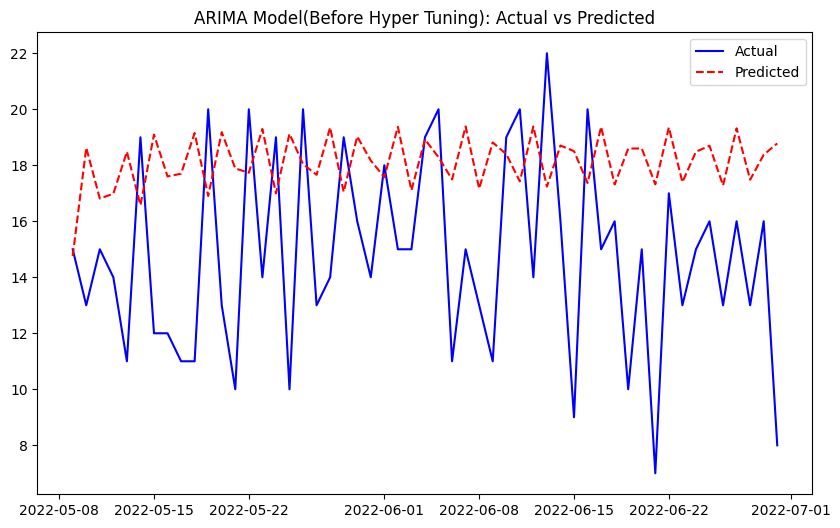

In [49]:
# Fit the ARIMA model (order=(p, d, q))
arima_model = ARIMA(train['updated_Quantity'], order=(5, 1, 5)).fit()
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Make predictions
predictions = arima_model.forecast(steps=len(test))

# Differencing metrics
adf_stat_diff = train['updated_Quantity'].diff().mean()

# Calculate metrics
mae = mean_absolute_error(test['updated_Quantity'], predictions)
rmse = np.sqrt(mean_squared_error(test['updated_Quantity'], predictions))
mape = np.mean(np.abs((test['updated_Quantity'] - predictions) / test['updated_Quantity'])) * 100
r2 = r2_score(test['updated_Quantity'], predictions)

# Display metrics
print(f"ARIMA Model Metrics(Before Hyper Tuning):\nMAE: {mae}\nRMSE: {rmse}\nMAPE: {mape:.2f}%\nR^2: {r2}\nDifferencing Mean: {adf_stat_diff}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(test['updated_Quantity'], label='Actual', color='blue')
plt.plot(predictions, label='Predicted', color='red', linestyle='--')
plt.title('ARIMA Model(Before Hyper Tuning): Actual vs Predicted')
plt.legend()
plt.show()


In [54]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Define a function to tune the ARIMA model
def tune_arima_model(train, test, p_range, d_range, q_range):
    best_params = None
    best_rmse = float("inf")
    results = []

    # Generate all combinations of p, d, q
    for p, d, q in itertools.product(p_range, d_range, q_range):
        try:
            # Fit ARIMA model with current (p, d, q)
            arima_model = ARIMA(train['updated_Quantity'], order=(p, d, q)).fit()
            predictions = arima_model.forecast(steps=len(test))

            # Calculate metrics
            mae = mean_absolute_error(test['updated_Quantity'], predictions)
            rmse = np.sqrt(mean_squared_error(test['updated_Quantity'], predictions))
            mape = np.mean(np.abs((test['updated_Quantity'] - predictions) / test['updated_Quantity'])) * 100
            r2 = r2_score(test['updated_Quantity'], predictions)

            # Save results
            results.append({'p': p, 'd': d, 'q': q, 'MAE': mae, 'RMSE': rmse, 'MAPE': mape, 'R2': r2})

            # Update best params if RMSE is improved
            if rmse < best_rmse:
                best_rmse = rmse
                best_params = (p, d, q)

        except Exception as e:
            print(f"Error with ARIMA({p}, {d}, {q}): {e}")
            continue

    return results, best_params, best_rmse

# Define ranges for p, d, and q
p_range = range(0, 6)  # AR order (p)
d_range = range(0, 3)  # Differencing (d)
q_range = range(0, 6)  # MA order (q)

# Perform hyperparameter tuning
arima_results, best_params, best_rmse = tune_arima_model(train, test, p_range, d_range, q_range)

# Display the best parameters and corresponding RMSE
print(f"Best ARIMA Parameters: {best_params} with RMSE: {best_rmse:.4f}")

# Convert results to a DataFrame for easier visualization
arima_results_df = pd.DataFrame(arima_results)


Best ARIMA Parameters: (0, 1, 0) with RMSE: 3.5819


ARIMA Model hyperparameter tuning results saved to 'arima_model_result.xlsx'.


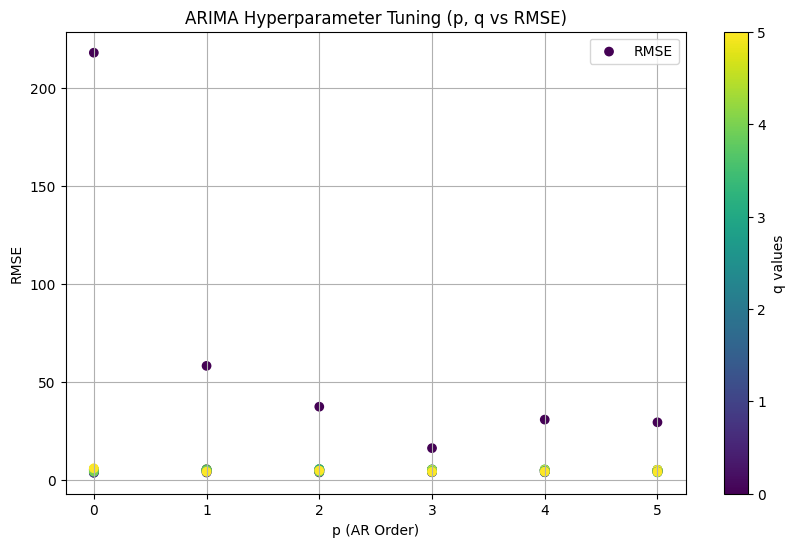

In [53]:
# Save results to an Excel file
arima_results_df.to_excel("arima_model_result.xlsx", index=False)
print("ARIMA Model hyperparameter tuning results saved to 'arima_model_result.xlsx'.")

# Visualize RMSE for different (p, d, q) combinations
plt.figure(figsize=(10, 6))
plt.scatter(arima_results_df['p'], arima_results_df['RMSE'], c=arima_results_df['q'], cmap='viridis', label='RMSE')
plt.colorbar(label='q values')
plt.title("ARIMA Hyperparameter Tuning (p, q vs RMSE)")
plt.xlabel("p (AR Order)")
plt.ylabel("RMSE")
plt.legend()
plt.grid()
plt.show()

Best ARIMA Model Metrics(After Hyper Tuning):
(p, d, q): (0, 1, 0)
MAE: 2.8679
RMSE: 3.5819
MAPE: 20.57%
R^2: -0.0465


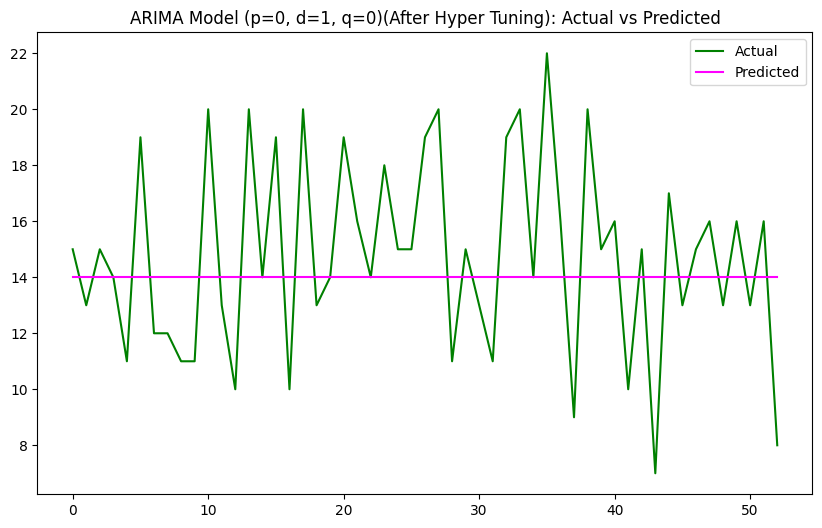

In [55]:
# Fit the ARIMA model with the best parameters
best_p, best_d, best_q = best_params
final_arima_model = ARIMA(train['updated_Quantity'], order=(best_p, best_d, best_q)).fit()
final_predictions = final_arima_model.forecast(steps=len(test))

# Calculate final metrics
final_mae = mean_absolute_error(test['updated_Quantity'], final_predictions)
final_rmse = np.sqrt(mean_squared_error(test['updated_Quantity'], final_predictions))
final_mape = np.mean(np.abs((test['updated_Quantity'] - final_predictions) / test['updated_Quantity'])) * 100
final_r2 = r2_score(test['updated_Quantity'], final_predictions)

# Display metrics
print(f"Best ARIMA Model Metrics(After Hyper Tuning):\n(p, d, q): {best_params}\nMAE: {final_mae:.4f}\nRMSE: {final_rmse:.4f}\nMAPE: {final_mape:.2f}%\nR^2: {final_r2:.4f}")

# Plot the actual vs predicted results
plt.figure(figsize=(10, 6))
plt.plot(test['updated_Quantity'].reset_index(drop=True), label='Actual', color='green')
plt.plot(final_predictions.reset_index(drop=True), label='Predicted', color='magenta')
plt.title(f"ARIMA Model (p={best_p}, d={best_d}, q={best_q})(After Hyper Tuning): Actual vs Predicted")
plt.legend()
plt.show()


**Implementation of SARIMA Model**

SARIMA Model Metrics(Before Hyper Tuning):
MAE: 5.860311727774639
RMSE: 6.808527425308862
MAPE: 47.73%
R^2: -2.780898152573253
Differencing Mean: 0.0


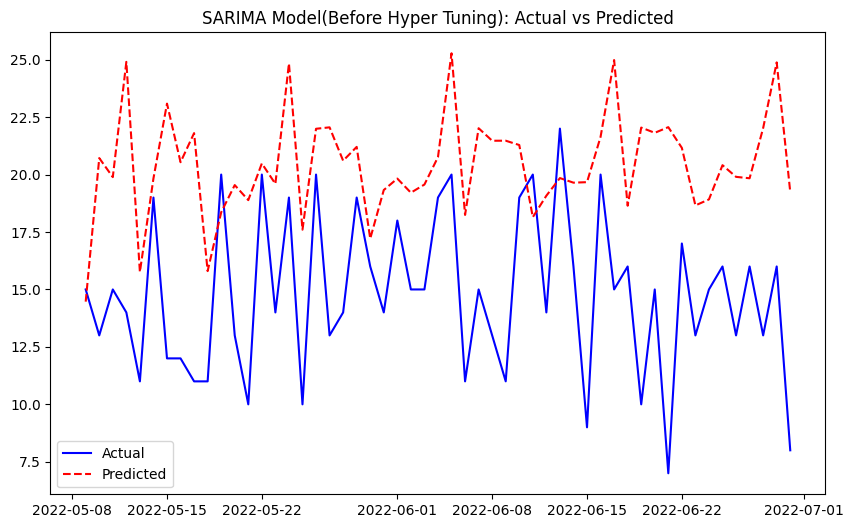

In [56]:
# Import SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Fit the SARIMA model using updated_Quantity
sarima_model = SARIMAX(train['updated_Quantity'], order=(5, 1, 5), seasonal_order=(1, 1, 1, 12)).fit()

# Make predictions
predictions = sarima_model.forecast(steps=len(test))

# Differencing metrics for updated_Quantity
adf_stat_diff = train['updated_Quantity'].diff().mean()

# Calculate metrics using updated_Quantity
mae = mean_absolute_error(test['updated_Quantity'], predictions)
rmse = np.sqrt(mean_squared_error(test['updated_Quantity'], predictions))
mape = np.mean(np.abs((test['updated_Quantity'] - predictions) / test['updated_Quantity'])) * 100
r2 = r2_score(test['updated_Quantity'], predictions)

# Display metrics
print(f"SARIMA Model Metrics(Before Hyper Tuning):\nMAE: {mae}\nRMSE: {rmse}\nMAPE: {mape:.2f}%\nR^2: {r2}\nDifferencing Mean: {adf_stat_diff}")

# Plot the results using updated_Quantity
plt.figure(figsize=(10, 6))
plt.plot(test['updated_Quantity'], label='Actual', color='blue')
plt.plot(predictions, label='Predicted', color='red', linestyle='--')
plt.title('SARIMA Model(Before Hyper Tuning): Actual vs Predicted')
plt.legend()
plt.show()


Hyperparameter Tuning

In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import itertools
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import concurrent.futures  # Parallelization library

warnings.filterwarnings('ignore')

# Define a function to fit and evaluate SARIMA models
def evaluate_sarima(params, train, test):
    p, d, q, sp, sd, sq, s_period = params
    try:
        # Fit SARIMA model with current (p, d, q) and seasonal (sp, sd, sq, s_period)
        sarima_model = SARIMAX(train['updated_Quantity'], order=(p, d, q), seasonal_order=(sp, sd, sq, s_period)).fit()
        predictions = sarima_model.forecast(steps=len(test))

        # Calculate metrics
        mae = mean_absolute_error(test['updated_Quantity'], predictions)
        rmse = np.sqrt(mean_squared_error(test['updated_Quantity'], predictions))
        mape = np.mean(np.abs((test['updated_Quantity'] - predictions) / test['updated_Quantity'])) * 100
        r2 = r2_score(test['updated_Quantity'], predictions)

        return (p, d, q, sp, sd, sq, s_period, mae, rmse, mape, r2)

    except Exception as e:
        print(f"Error with SARIMA({p}, {d}, {q}, {sp}, {sd}, {sq}, {s_period}): {e}")
        return None

# Define a function to tune the SARIMA model with parallelization
def tune_sarima_model(train, test, p_range, d_range, q_range, seasonal_p_range, seasonal_d_range, seasonal_q_range, seasonal_periods):
    best_params = None
    best_rmse = float("inf")
    results = []

    # Generate all combinations of p, d, q for seasonal and non-seasonal orders
    param_combinations = itertools.product(p_range, d_range, q_range, seasonal_p_range, seasonal_d_range, seasonal_q_range, seasonal_periods)

    # Use ThreadPoolExecutor for parallelization
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = {executor.submit(evaluate_sarima, params, train, test): params for params in param_combinations}
        for future in concurrent.futures.as_completed(futures):
            result = future.result()
            if result:
                p, d, q, sp, sd, sq, s_period, mae, rmse, mape, r2 = result
                results.append({'p': p, 'd': d, 'q': q, 'sp': sp, 'sd': sd, 'sq': sq, 's_period': s_period, 'MAE': mae, 'RMSE': rmse, 'MAPE': mape, 'R2': r2})

                # Update best params if RMSE is improved
                if rmse < best_rmse:
                    best_rmse = rmse
                    best_params = (p, d, q, sp, sd, sq, s_period)

    return results, best_params, best_rmse

# Define ranges for p, d, q and seasonal parameters
p_range = range(0, 3)  # AR order (p)
d_range = range(0, 2)  # Differencing (d)
q_range = range(0, 3)  # MA order (q)
seasonal_p_range = range(0, 2)  # Seasonal AR order (sp)
seasonal_d_range = range(0, 2)  # Seasonal differencing (sd)
seasonal_q_range = range(0, 2)  # Seasonal MA order (sq)
seasonal_periods = [12]  # Seasonal period (e.g., 12 for monthly data)

# Perform hyperparameter tuning with parallelization
sarima_results, best_params, best_rmse = tune_sarima_model(train, test, p_range, d_range, q_range, seasonal_p_range, seasonal_d_range, seasonal_q_range, seasonal_periods)

# Display the best parameters and corresponding RMSE
print(f"Best SARIMA Parameters: {best_params} with RMSE: {best_rmse:.4f}")

# Convert results to a DataFrame for easier visualization
sarima_results_df = pd.DataFrame(sarima_results)

# Optionally, you can print the results DataFrame to see the parameters and performance metrics for all tested combinations
print(sarima_results_df)


Best SARIMA Parameters: (0, 1, 0, 0, 0, 0, 12) with RMSE: 3.5819
     p  d  q  sp  sd  sq  s_period        MAE       RMSE        MAPE  \
0    0  0  0   0   0   0        12  14.754717  15.164507  100.000000   
1    0  0  0   0   1   0        12   4.471698   5.625079   32.724283   
2    0  0  0   1   0   0        12   4.327815   5.354840   29.417313   
3    0  0  0   0   0   1        12  13.392603  14.311298   89.976827   
4    0  0  0   1   1   0        12   5.277093   6.714788   40.115746   
..  .. .. ..  ..  ..  ..       ...        ...        ...         ...   
139  2  1  1   1   0   1        12   4.442720   5.319976   37.547110   
140  2  1  2   0   1   1        12   3.439278   4.093685   27.047499   
141  2  1  2   1   1   0        12   6.416256   7.889511   43.822667   
142  2  1  2   1   0   1        12   4.415465   5.292543   37.332518   
143  2  1  2   1   1   1        12   3.464686   4.116038   27.154778   

            R2  
0   -17.756214  
1    -1.580749  
2    -1.338738  
3 

Best SARIMA Model Metrics:
(p, d, q, sp, sd, sq, s_period)(After Hyper Tuning): (0, 1, 0, 0, 0, 0, 12)
MAE: 2.8679
RMSE: 3.5819
MAPE: 20.57%
R²: -0.0465


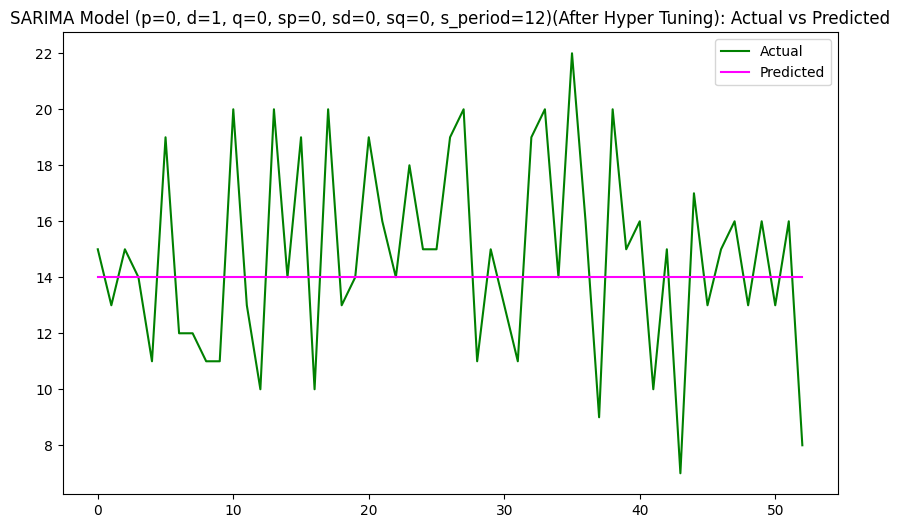

In [58]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Train and evaluate the best SARIMA model
best_p, best_d, best_q, best_sp, best_sd, best_sq, best_s_period = best_params

# Fit the final SARIMA model using the best parameters
final_sarima_model = SARIMAX(train['updated_Quantity'],
                              order=(best_p, best_d, best_q),
                              seasonal_order=(best_sp, best_sd, best_sq, best_s_period)).fit()

# Make predictions on the test set
final_predictions = final_sarima_model.forecast(steps=len(test))

# Calculate the final evaluation metrics
final_mae = mean_absolute_error(test['updated_Quantity'], final_predictions)
final_rmse = np.sqrt(mean_squared_error(test['updated_Quantity'], final_predictions))
final_mape = np.mean(np.abs((test['updated_Quantity'] - final_predictions) / test['updated_Quantity'])) * 100
final_r2 = r2_score(test['updated_Quantity'], final_predictions)

# Display the final model's evaluation metrics
print(f"Best SARIMA Model Metrics:\n(p, d, q, sp, sd, sq, s_period)(After Hyper Tuning): {best_params}")
print(f"MAE: {final_mae:.4f}")
print(f"RMSE: {final_rmse:.4f}")
print(f"MAPE: {final_mape:.2f}%")
print(f"R²: {final_r2:.4f}")

# Plot the actual vs predicted results
plt.figure(figsize=(10, 6))
plt.plot(test['updated_Quantity'].reset_index(drop=True), label='Actual', color='green')
plt.plot(final_predictions.reset_index(drop=True), label='Predicted', color='magenta')
plt.title(f"SARIMA Model (p={best_p}, d={best_d}, q={best_q}, sp={best_sp}, sd={best_sd}, sq={best_sq}, s_period={best_s_period})(After Hyper Tuning): Actual vs Predicted")
plt.legend()
plt.show()


SARIMA Model hyperparameter tuning results saved to 'sarima_model_result.xlsx'.


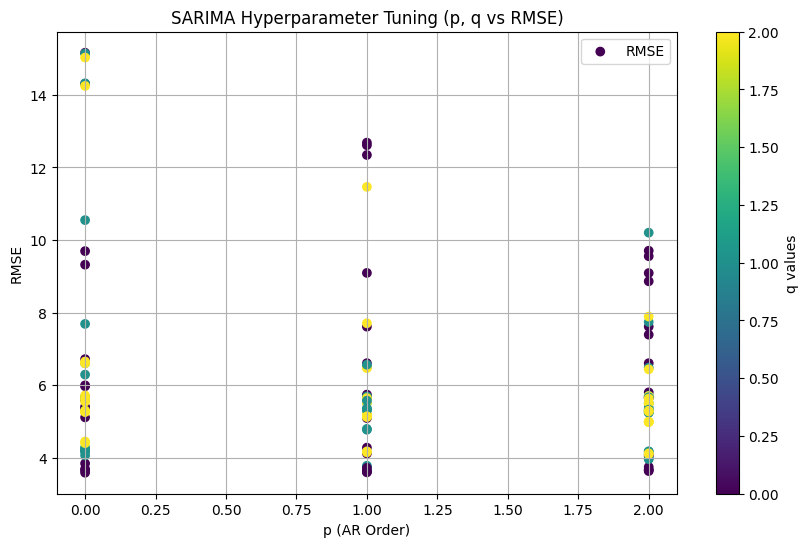

In [59]:
# Save results to an Excel file
sarima_results_df.to_excel("sarima_model_result.xlsx", index=False)
print("SARIMA Model hyperparameter tuning results saved to 'sarima_model_result.xlsx'.")

# Visualize RMSE for different (p, d, q) combinations
plt.figure(figsize=(10, 6))
plt.scatter(sarima_results_df['p'], sarima_results_df['RMSE'], c=sarima_results_df['q'], cmap='viridis', label='RMSE')
plt.colorbar(label='q values')
plt.title("SARIMA Hyperparameter Tuning (p, q vs RMSE)")
plt.xlabel("p (AR Order)")
plt.ylabel("RMSE")
plt.legend()
plt.grid()
plt.show()


**Implementation of ARIMAX Model**

ARIMAX Model Metrics(Before Hyper Tuning):
MAE: 4.123457399182951
RMSE: 5.084099610018834
MAPE: 35.21%
R^2: -1.1082237335790817
Differencing Mean: 0.0


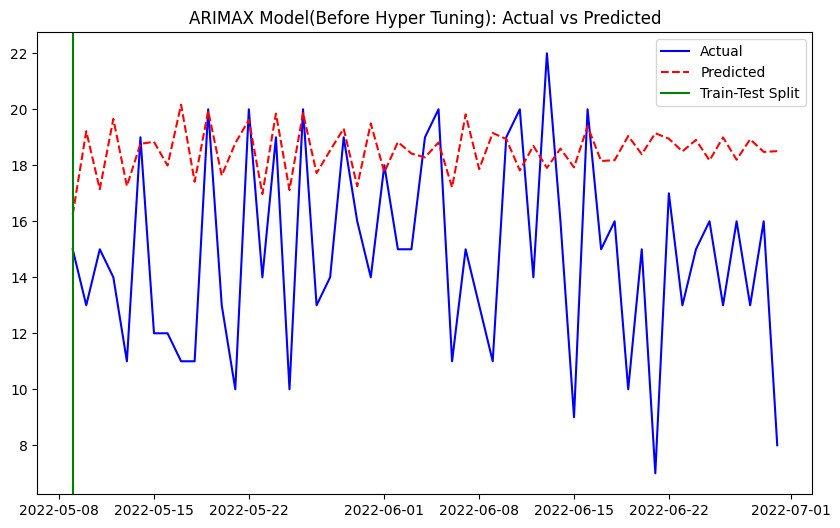

In [63]:
# Import ARIIMAX for ARIMAX implementation
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Define exogenous variable
# Example: Using lagged 'Quantity' as an exogenous variable (replace with actual exogenous variable if available)
exog_train = train['updated_Quantity'].shift(1).fillna(0)
exog_test = test['updated_Quantity'].shift(1).fillna(0)

# Fit the ARIMAX model
arimax_model = SARIMAX(train['updated_Quantity'], exog=exog_train, order=(5, 1, 5)).fit()

# Make predictions
predictions = arimax_model.forecast(steps=len(test), exog=exog_test)

# Differencing: Analyze the mean of the differenced series
train_diff = train['updated_Quantity'].diff().dropna()
adf_stat_diff = train_diff.mean()

# Calculate metrics
mae = mean_absolute_error(test['updated_Quantity'], predictions)
rmse = np.sqrt(mean_squared_error(test['updated_Quantity'], predictions))
mape = np.mean(np.abs((test['updated_Quantity'] - predictions) / test['updated_Quantity'])) * 100
r2 = r2_score(test['updated_Quantity'], predictions)

# Display metrics
print(f"ARIMAX Model Metrics(Before Hyper Tuning):")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape:.2f}%")
print(f"R^2: {r2}")
print(f"Differencing Mean: {adf_stat_diff}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(test['updated_Quantity'], label='Actual', color='blue')
plt.plot(predictions, label='Predicted', color='red', linestyle='--')
plt.axvline(test.index[0], color='green', label='Train-Test Split')
plt.title('ARIMAX Model(Before Hyper Tuning): Actual vs Predicted')
plt.legend()
plt.show()


Hyperparameter Tuning for ARIMAX Model

In [64]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import itertools
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Define a function to tune the ARIMAX model
def tune_arimax_model(train, test, exog_train, exog_test, p_range, d_range, q_range):
    best_params = None
    best_rmse = float("inf")
    results = []

    # Generate all combinations of p, d, q
    for p, d, q in itertools.product(p_range, d_range, q_range):
        try:
            # Fit ARIMAX model with current (p, d, q)
            arimax_model = SARIMAX(train['updated_Quantity'], exog=exog_train, order=(p, d, q)).fit()
            predictions = arimax_model.forecast(steps=len(test), exog=exog_test)

            # Calculate metrics
            mae = mean_absolute_error(test['updated_Quantity'], predictions)
            rmse = np.sqrt(mean_squared_error(test['updated_Quantity'], predictions))
            mape = np.mean(np.abs((test['updated_Quantity'] - predictions) / test['updated_Quantity'])) * 100
            r2 = r2_score(test['updated_Quantity'], predictions)

            # Save results
            results.append({'p': p, 'd': d, 'q': q, 'MAE': mae, 'RMSE': rmse, 'MAPE': mape, 'R2': r2})

            # Update best params if RMSE is improved
            if rmse < best_rmse:
                best_rmse = rmse
                best_params = (p, d, q)

        except Exception as e:
            print(f"Error with ARIMAX({p}, {d}, {q}): {e}")
            continue

    return results, best_params, best_rmse

# Define exogenous variables for train and test
exog_train = train['updated_Quantity'].shift(1).fillna(0)  # Example exogenous variable (can replace with actual exog data)
exog_test = test['updated_Quantity'].shift(1).fillna(0)

# Define ranges for p, d, and q
p_range = range(0, 6)  # AR order (p)
d_range = range(0, 3)  # Differencing (d)
q_range = range(0, 6)  # MA order (q)

# Perform hyperparameter tuning
arimax_results, best_params, best_rmse = tune_arimax_model(train, test, exog_train, exog_test, p_range, d_range, q_range)

# Display the best parameters and corresponding RMSE
print(f"Best ARIMAX Parameters: {best_params} with RMSE: {best_rmse:.4f}")

# Convert results to a DataFrame for easier visualization
arimax_results_df = pd.DataFrame(arimax_results)


Best ARIMAX Parameters: (3, 1, 0) with RMSE: 3.8304


ARIMAX Model hyperparameter tuning results saved to 'arimax_model_result.xlsx'.


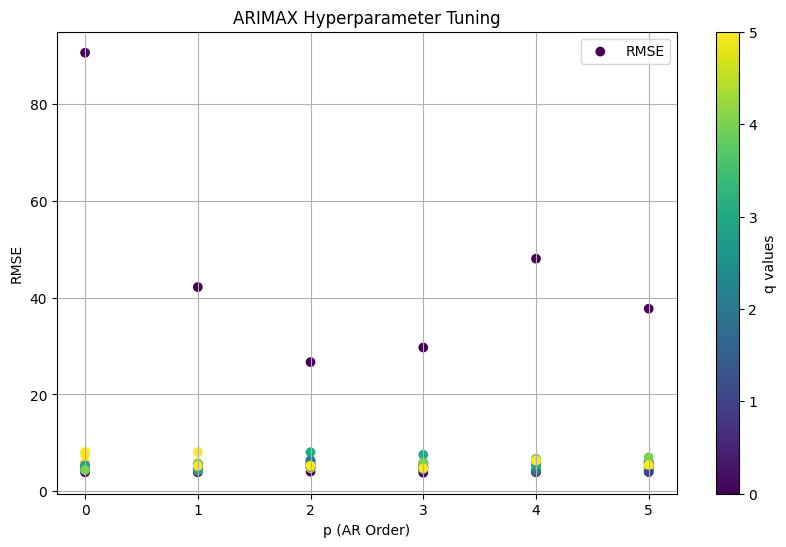

In [65]:
# Save results to an Excel file
arimax_results_df.to_excel("arimax_model_result.xlsx", index=False)
print("ARIMAX Model hyperparameter tuning results saved to 'arimax_model_result.xlsx'.")

# Visualize RMSE for different (p, d, q) combinations
plt.figure(figsize=(10, 6))
plt.scatter(arimax_results_df['p'], arimax_results_df['RMSE'], c=arimax_results_df['q'], cmap='viridis', label='RMSE')
plt.colorbar(label='q values')
plt.title("ARIMAX Hyperparameter Tuning")
plt.xlabel("p (AR Order)")
plt.ylabel("RMSE")
plt.legend()
plt.grid()
plt.show()


Best ARIMAX Model Metrics(After Hyper Tuning):
(p, d, q): (3, 1, 0)
MAE: 3.1932
RMSE: 3.8304
MAPE: 26.27%
R^2: -0.1967


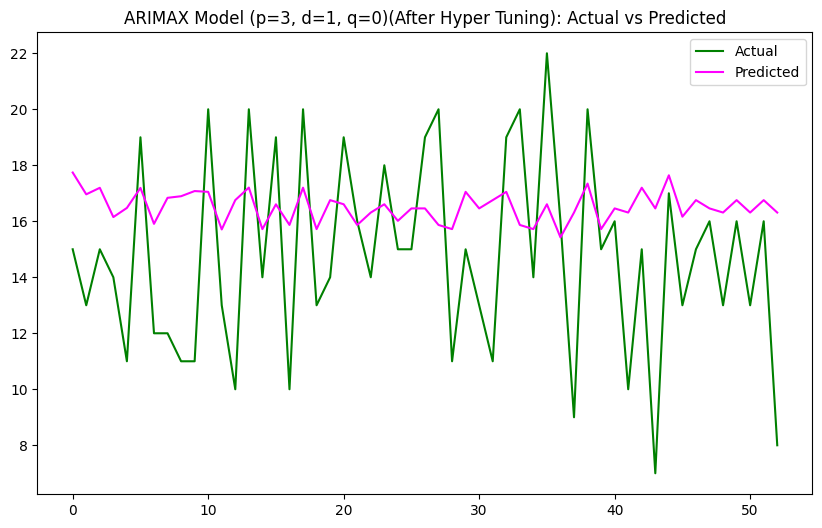

In [66]:
# Get the best parameters for ARIMAX
best_p, best_d, best_q = best_params

# Fit the final ARIMAX model using updated_Quantity
final_arimax_model = SARIMAX(train['updated_Quantity'], exog=exog_train, order=(best_p, best_d, best_q)).fit()

# Make predictions
final_predictions = final_arimax_model.forecast(steps=len(test), exog=exog_test)

# Calculate final metrics using updated_Quantity
final_mae = mean_absolute_error(test['updated_Quantity'], final_predictions)
final_rmse = np.sqrt(mean_squared_error(test['updated_Quantity'], final_predictions))
final_mape = np.mean(np.abs((test['updated_Quantity'] - final_predictions) / test['updated_Quantity'])) * 100
final_r2 = r2_score(test['updated_Quantity'], final_predictions)

# Display metrics
print(f"Best ARIMAX Model Metrics(After Hyper Tuning):\n(p, d, q): {best_params}\nMAE: {final_mae:.4f}\nRMSE: {final_rmse:.4f}\nMAPE: {final_mape:.2f}%\nR^2: {final_r2:.4f}")

# Plot the actual vs predicted results
plt.figure(figsize=(10, 6))
plt.plot(test['updated_Quantity'].reset_index(drop=True), label='Actual', color='green')
plt.plot(final_predictions.reset_index(drop=True), label='Predicted', color='magenta')
plt.title(f"ARIMAX Model (p={best_p}, d={best_d}, q={best_q})(After Hyper Tuning): Actual vs Predicted")
plt.legend()
plt.show()


**Implementation of SARIMAX Model**

SARIMAX Model Metrics(Before Hyper Tuning):
MAE: 5.1214
RMSE: 6.1175
MAPE: 41.98%
R^2: -2.0523
Differencing Mean: 0.0000


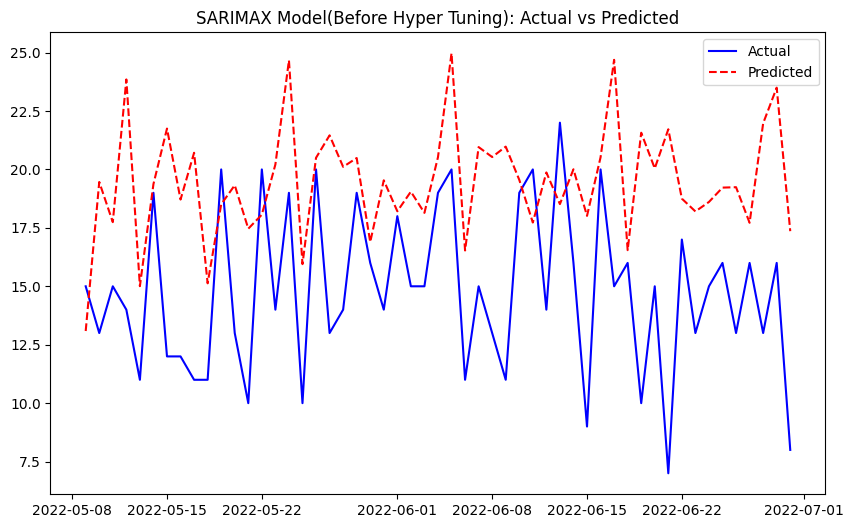

In [67]:
# Define exogenous variable (placeholder example: lagged Quantity)
import warnings
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Ignore all warnings
warnings.filterwarnings('ignore')

# Define exogenous variables using the lagged "updated_Quantity"
exog_train = train['updated_Quantity'].shift(1).fillna(0)  # Using updated_Quantity for exogenous variable
exog_test = test['updated_Quantity'].shift(1).fillna(0)    # Using updated_Quantity for exogenous variable

# Fit the SARIMAX model with updated_Quantity as both endogenous and exogenous variable
sarimax_model = SARIMAX(train['updated_Quantity'], exog=exog_train, order=(5, 1, 5), seasonal_order=(1, 1, 1, 12)).fit()

# Make predictions
predictions = sarimax_model.forecast(steps=len(test), exog=exog_test)

# Differencing metrics (example: ADF test for differencing)
adf_stat_diff = train['updated_Quantity'].diff().mean()

# Calculate metrics
mae = mean_absolute_error(test['updated_Quantity'], predictions)
rmse = np.sqrt(mean_squared_error(test['updated_Quantity'], predictions))
mape = np.mean(np.abs((test['updated_Quantity'] - predictions) / test['updated_Quantity'])) * 100
r2 = r2_score(test['updated_Quantity'], predictions)

# Display metrics
print(f"SARIMAX Model Metrics(Before Hyper Tuning):\nMAE: {mae:.4f}\nRMSE: {rmse:.4f}\nMAPE: {mape:.2f}%\nR^2: {r2:.4f}\nDifferencing Mean: {adf_stat_diff:.4f}")

# Plot the actual vs predicted results
plt.figure(figsize=(10, 6))
plt.plot(test['updated_Quantity'], label='Actual', color='blue')
plt.plot(predictions, label='Predicted', color='red', linestyle='--')
plt.title('SARIMAX Model(Before Hyper Tuning): Actual vs Predicted')
plt.legend()
plt.show()


Hyperparameter tuning

In [68]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
import numpy as np
import pandas as pd
import warnings
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import concurrent.futures  # For parallelization

# Ignore warnings
warnings.filterwarnings('ignore')

# Define a function to fit and evaluate SARIMAX models
def evaluate_sarimax(params, train, test, exog_train, exog_test):
    p, d, q, sp, sd, sq, s = params
    try:
        # Fit SARIMAX model with current (p, d, q) and seasonal (sp, sd, sq, s)
        sarimax_model = SARIMAX(train['updated_Quantity'], exog=exog_train, order=(p, d, q), seasonal_order=(sp, sd, sq, s)).fit()
        predictions = sarimax_model.forecast(steps=len(test), exog=exog_test)

        # Calculate metrics
        mae = mean_absolute_error(test['updated_Quantity'], predictions)
        rmse = np.sqrt(mean_squared_error(test['updated_Quantity'], predictions))
        mape = np.mean(np.abs((test['updated_Quantity'] - predictions) / test['updated_Quantity'])) * 100
        r2 = r2_score(test['updated_Quantity'], predictions)

        return (p, d, q, sp, sd, sq, s, mae, rmse, mape, r2)

    except Exception as e:
        print(f"Error with SARIMAX({p}, {d}, {q}, {sp}, {sd}, {sq}, {s}): {e}")
        return None

# Define a function to tune the SARIMAX model with parallelization
def tune_sarimax_model(train, test, exog_train, exog_test, p_range, d_range, q_range, seasonal_p_range, seasonal_d_range, seasonal_q_range, seasonal_s_range):
    best_params = None
    best_rmse = float("inf")
    results = []

    # Generate all combinations of p, d, q and seasonal (sp, sd, sq, s)
    param_combinations = itertools.product(p_range, d_range, q_range, seasonal_p_range, seasonal_d_range, seasonal_q_range, seasonal_s_range)

    # Use ThreadPoolExecutor for parallelization
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = {executor.submit(evaluate_sarimax, params, train, test, exog_train, exog_test): params for params in param_combinations}
        for future in concurrent.futures.as_completed(futures):
            result = future.result()
            if result:
                p, d, q, sp, sd, sq, s, mae, rmse, mape, r2 = result
                results.append({'p': p, 'd': d, 'q': q, 'sp': sp, 'sd': sd, 'sq': sq, 's': s, 'MAE': mae, 'RMSE': rmse, 'MAPE': mape, 'R2': r2})

                # Update best params if RMSE is improved
                if rmse < best_rmse:
                    best_rmse = rmse
                    best_params = (p, d, q, sp, sd, sq, s)

    return results, best_params, best_rmse

# Define exogenous variables for train and test (can be adjusted based on your data)
exog_train = train['updated_Quantity'].shift(1).fillna(0)  # Example exogenous variable (can replace with actual exog data)
exog_test = test['updated_Quantity'].shift(1).fillna(0)

# Define ranges for p, d, q, and seasonal (sp, sd, sq, s)
p_range = range(0, 3)  # AR order (p) reduced for faster execution
d_range = range(0, 2)  # Differencing (d) reduced for faster execution
q_range = range(0, 3)  # MA order (q) reduced for faster execution

seasonal_p_range = range(0, 2)  # Seasonal AR order (sp)
seasonal_d_range = range(0, 2)  # Seasonal differencing (sd)
seasonal_q_range = range(0, 2)  # Seasonal MA order (sq)
seasonal_s_range = [12]  # Seasonal period (s)

# Perform hyperparameter tuning with parallelization
sarimax_results, best_params, best_rmse = tune_sarimax_model(train, test, exog_train, exog_test, p_range, d_range, q_range, seasonal_p_range, seasonal_d_range, seasonal_q_range, seasonal_s_range)

# Display the best parameters and corresponding RMSE
print(f"Best SARIMAX Parameters: {best_params} with RMSE: {best_rmse:.4f}")

# Convert results to a DataFrame for easier visualization
sarimax_results_df = pd.DataFrame(sarimax_results)


Best SARIMAX Parameters: (0, 1, 0, 1, 0, 1, 12) with RMSE: 3.7255


SARIMAX Model hyperparameter tuning results saved to 'sarimax_model_result.xlsx'.


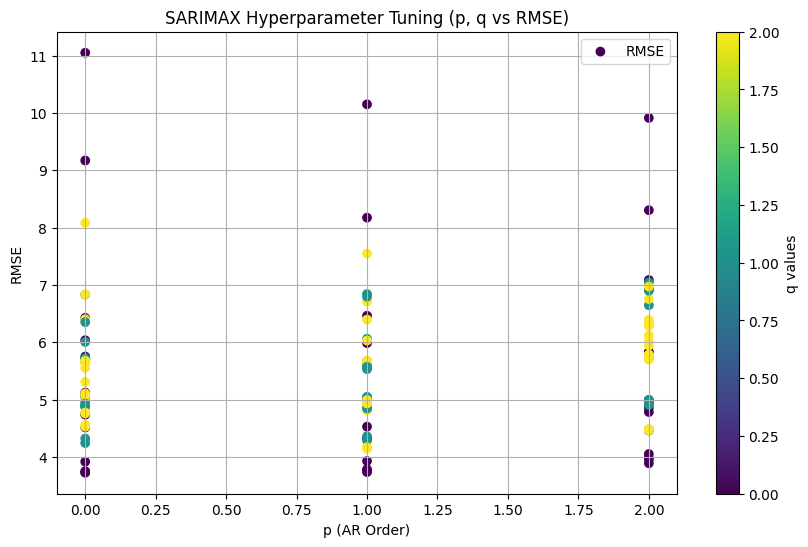

In [69]:
# Save results to an Excel file
sarimax_results_df.to_excel("sarimax_model_result.xlsx", index=False)
print("SARIMAX Model hyperparameter tuning results saved to 'sarimax_model_result.xlsx'.")

# Visualize RMSE for different (p, d, q, sp, sd, sq, s) combinations
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(sarimax_results_df['p'], sarimax_results_df['RMSE'], c=sarimax_results_df['q'], cmap='viridis', label='RMSE')
plt.colorbar(label='q values')
plt.title("SARIMAX Hyperparameter Tuning (p, q vs RMSE)")
plt.xlabel("p (AR Order)")
plt.ylabel("RMSE")
plt.legend()
plt.grid()
plt.show()


Best SARIMAX Model Metrics(After Hyper Tuning):
(p, d, q, sp, sd, sq, s): (0, 1, 0, 1, 0, 1, 12)
MAE: 3.0448
RMSE: 3.7255
MAPE: 24.16%
R^2: -0.1320


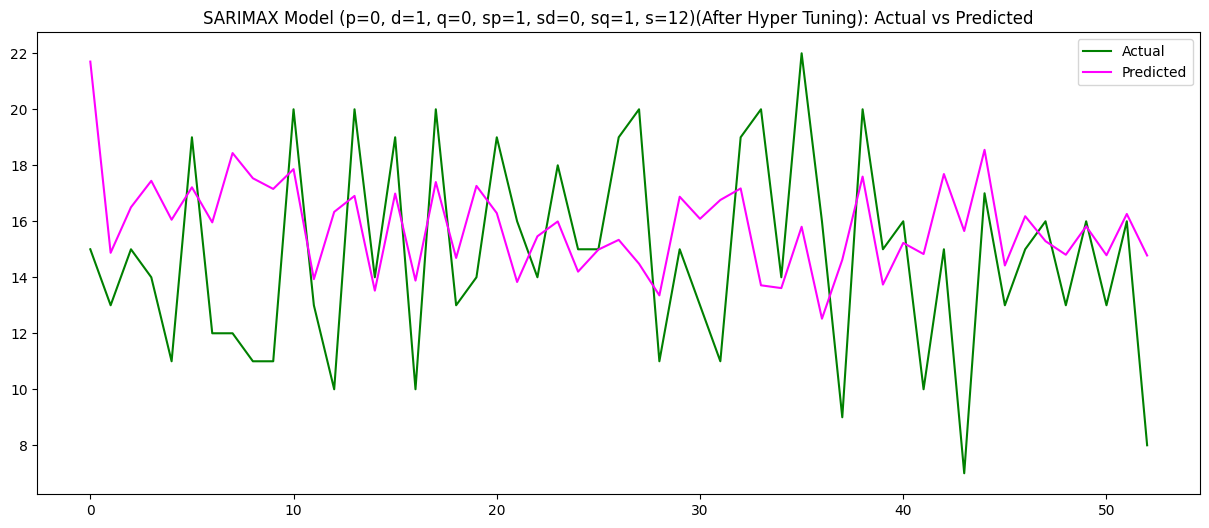

In [70]:
# Train and Evaluate the Best SARIMAX Model
best_p, best_d, best_q, best_sp, best_sd, best_sq, best_s = best_params

# Fit the final SARIMAX model with exogenous variables
final_sarimax_model = SARIMAX(train['updated_Quantity'], exog=exog_train, order=(best_p, best_d, best_q), seasonal_order=(best_sp, best_sd, best_sq, best_s)).fit()

# Forecast the future values
final_predictions = final_sarimax_model.forecast(steps=len(test), exog=exog_test)

# Calculate final metrics
final_mae = mean_absolute_error(test['updated_Quantity'], final_predictions)
final_rmse = np.sqrt(mean_squared_error(test['updated_Quantity'], final_predictions))
final_mape = np.mean(np.abs((test['updated_Quantity'] - final_predictions) / test['updated_Quantity'])) * 100
final_r2 = r2_score(test['updated_Quantity'], final_predictions)

# Display metrics
print(f"Best SARIMAX Model Metrics(After Hyper Tuning):\n(p, d, q, sp, sd, sq, s): {best_params}\nMAE: {final_mae:.4f}\nRMSE: {final_rmse:.4f}\nMAPE: {final_mape:.2f}%\nR^2: {final_r2:.4f}")

# Plot the actual vs predicted results
plt.figure(figsize=(15, 6))
plt.plot(test['updated_Quantity'].reset_index(drop=True), label='Actual', color='green')
plt.plot(final_predictions.reset_index(drop=True), label='Predicted', color='magenta')
plt.title(f"SARIMAX Model (p={best_p}, d={best_d}, q={best_q}, sp={best_sp}, sd={best_sd}, sq={best_sq}, s={best_s})(After Hyper Tuning): Actual vs Predicted")
plt.legend()
plt.show()


In [80]:
from tabulate import tabulate

# Model metrics for each model (SARIMAX, ARIMAX, SARIMA, ARIMA, MA, AR)
metrics = [
    {
        "Model": "SARIMAX",
        "MAE": 3.0448,
        "RMSE": 3.7255,
        "MAPE": 24.16,
        "R^2": -0.1320
    },
    {
        "Model": "ARIMAX",
        "MAE": 3.1932,
        "RMSE": 3.8304,
        "MAPE": 26.27,
        "R^2": -0.1967
    },
    {
        "Model": "SARIMA",
        "MAE": 2.8679,
        "RMSE": 3.5819,
        "MAPE": 20.57,
        "R^2": -0.0465
    },
    {
        "Model": "ARIMA",
        "MAE": 2.8679,
        "RMSE": 3.5819,
        "MAPE": 20.57,
        "R^2": -0.0465
    },
    {
        "Model": "MA",
        "MAE": 4.0480,
        "RMSE": 4.8437,
        "MAPE": 34.15,
        "R^2": -0.9135
    },
    {
        "Model": "AR",
        "MAE": 3.9591,
        "RMSE": 4.7430,
        "MAPE": 33.40,
        "R^2": -0.8348
    }
]

# Extracting the headers from the keys of the first dictionary
headers = list(metrics[0].keys())

# Converting the list of dictionaries to a list of lists (values)
table_data = [list(model.values()) for model in metrics]

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid"))


+---------+--------+--------+--------+---------+
| Model   |    MAE |   RMSE |   MAPE |     R^2 |
+=========+========+========+========+=========+
| SARIMAX | 3.0448 | 3.7255 |  24.16 | -0.132  |
+---------+--------+--------+--------+---------+
| ARIMAX  | 3.1932 | 3.8304 |  26.27 | -0.1967 |
+---------+--------+--------+--------+---------+
| SARIMA  | 2.8679 | 3.5819 |  20.57 | -0.0465 |
+---------+--------+--------+--------+---------+
| ARIMA   | 2.8679 | 3.5819 |  20.57 | -0.0465 |
+---------+--------+--------+--------+---------+
| MA      | 4.048  | 4.8437 |  34.15 | -0.9135 |
+---------+--------+--------+--------+---------+
| AR      | 3.9591 | 4.743  |  33.4  | -0.8348 |
+---------+--------+--------+--------+---------+
